<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>SIC</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }
        table {
            border-collapse: collapse;
            width: 50%;
            margin: 20px auto; /* Center table horizontally */
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center; /* Center text inside table cells */
        }
        th {
            background-color: #f2f2f2;
        }
        h1 {
            margin-bottom: 20px;
        }
    </style>
</head>
<body>
    <div>
        <h1>Team_6_G2</h1>
        <table>
            <thead>
                <tr>
                    <th>Name</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><strong>Abdelrhman Waild</strong></td>
                </tr>
                <tr>
                    <td><strong>Mohamed Elkhateb</strong></td>
                </tr>
                <tr>
                    <td><strong>Mohamed Wael</strong></td>
                </tr>
                <tr>
                    <td><strong>Omar Hossam</strong></td>
                </tr>
            </tbody>
        </table>
    </div>
</body>
</html>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
%config IPCompleter.greedy=True
from jedi import settings
settings.case_insensitive_completion = True

In [3]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [60]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df=data.copy()

In [61]:
df.rename(columns={
    'EmployeeCount': 'Employee_Count',  
    'EmployeeNumber': 'Employee_ID',  
    'StandardHours': 'Standard_Hours',  
    'Over18': 'Is_Over_18',  
}, inplace=True)

****************************

### Meta Data

#### IBM HR Analytics Employee Attrition & Performance Dataset Metadata (Updated)

This dataset provides information about employee attributes and performance, including their demographic details, job role, and work-life balance. It is useful for understanding employee attrition patterns and performance factors.

| Column Name                | Description                                                                                   |
|----------------------------|-----------------------------------------------------------------------------------------------|
| `Age`                      | Age of the employee.                                                                          |
| `Attrition`             | Whether the employee left the company (Yes/No).                                               |
| `BusinessTravel`           | Frequency of travel for business purposes (e.g., Travel_Rarely, Travel_Frequently).           |
| `DailyRate`                | Daily rate of the employee in USD.                                                            |
| `Department`               | Department in which the employee works (e.g., Sales, Research & Development, Human Resources).|
| `DistanceFromHome`         | Distance from the employee's home to their workplace (in kilometers/miles).                   |
| `Education`                | Education level of the employee (1 = 'Below College', 2 = 'College', 3 = 'Bachelor', 4 = 'Master', 5 = 'Doctor'). |
| `EducationField`           | Field of education of the employee (e.g., Life Sciences, Marketing, Technical Degree).        |
| `Employee_Count`           | Number of employees in the company (usually a constant value like 1).                         |
| `Employee_ID`              | Unique identifier for each employee.                                                          |
| `EnvironmentSatisfaction`  | Employee satisfaction with the work environment (1 = 'Low', 2 = 'Medium', 3 = 'High', 4 = 'Very High'). |
| `Gender`                   | Gender of the employee (Male/Female).                                                         |
| `HourlyRate`               | Hourly wage rate of the employee in USD.                                                      |
| `JobInvolvement`           | Employee's level of involvement in their job (1 = 'Low', 2 = 'Medium', 3 = 'High', 4 = 'Very High'). |
| `JobLevel`                 | Job level within the company (higher values represent higher positions).                      |
| `JobRole`                  | Job role or title of the employee (e.g., Sales Executive, Research Scientist).                |
| `JobSatisfaction`          | Job satisfaction level of the employee (1 = 'Low', 2 = 'Medium', 3 = 'High', 4 = 'Very High').|
| `MaritalStatus`            | Marital status of the employee (e.g., Single, Married, Divorced).                             |
| `MonthlyIncome`            | Monthly income of the employee in USD.                                                        |
| `MonthlyRate`              | Monthly rate of the employee in USD.                                                          |
| `NumCompaniesWorked`       | Number of companies the employee has worked for.                                              |
| `Is_Over_18`               | Whether the employee is over 18 years old (Y = Yes, N = No).                                  |
| `OverTime`                 | Whether the employee works overtime (Yes/No).                                                 |
| `PercentSalaryHike`        | Percentage increase in salary during the last year.                                           |
| `PerformanceRating`        | Performance rating of the employee (1 = 'Low', 2 = 'Good', 3 = 'Excellent', 4 = 'Outstanding'). |
| `RelationshipSatisfaction` | Satisfaction level with relationships at work (1 = 'Low', 2 = 'Medium', 3 = 'High', 4 = 'Very High'). |
| `Standard_Hours`           | Standard working hours per week (typically 40 hours).                                         |
| `StockOptionLevel`         | Level of stock options granted to the employee (0 = 'None', 1 = 'Low', 2 = 'Medium', 3 = 'High'). |
| `TotalWorkingYears`        | Total years of work experience of the employee.                                               |
| `TrainingTimesLastYear`    | Number of times the employee received training in the last year.                              |
| `WorkLifeBalance`          | Work-life balance rating of the employee (1 = 'Bad', 2 = 'Good', 3 = 'Better', 4 = 'Best').   |
| `YearsAtCompany`           | Number of years the employee has worked at the company.                                       |
| `YearsInCurrentRole`       | Number of years the employee has been in their current role.                                  |
| `YearsSinceLastPromotion`  | Number of years since the employee's last promotion.                                          |
| `YearsWithCurrManager`     | Number of years the employee has worked with their current manager.                           |


In [62]:
df.shape

(1470, 35)

In [63]:
df.sample(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
416   38        No  Travel_Frequently       1490  Research & Development   
509   33        No  Travel_Frequently       1296  Research & Development   
83    38        No         Non-Travel        573  Research & Development   

     DistanceFromHome  Education EducationField  Employee_Count  Employee_ID  \
416                 2          2  Life Sciences               1          556   
509                 6          3  Life Sciences               1          692   
83                  6          3        Medical               1          107   

     ...  RelationshipSatisfaction Standard_Hours  StockOptionLevel  \
416  ...                         3             80                 1   
509  ...                         3             80                 1   
83   ...                         4             80                 3   

     TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
416                  1                      3               3               1   
509                 15                      2               1              13   
83                  17                      3               3              13   

    YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
416                  0                        0                     0  
509                 11                        4                     7  
83                  11                        1                     9  

[3 rows x 35 columns]

#### Check duplicaed and Null values

In [64]:
df.duplicated().any()

False

* No duplicated values 

In [8]:
nulls_cnt = (df.isnull().sum()/len(df))*100
nulls = pd.DataFrame(nulls_cnt, columns=['Null percentage'])
nulls = nulls[nulls['Null percentage']>0]
nulls = nulls.sort_values(by='Null percentage', ascending=False)
display(nulls)

Empty DataFrame
Columns: [Null percentage]
Index: []

- No null values

#### Check Unique Values 

In [9]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [10]:
for col in df.columns:
    print(col,':')
    print(df[col].unique())
    print('='*30)

Age :
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition :
['Yes' 'No']
BusinessTravel :
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate :
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

From the previous results, I found that these columns contain only one unique value, so they should be dropped
> Employee_Count (contains 1 only) , Is_Over_18 (contain Y only ) ,Standard_Hours (contain 80 only)

In [65]:
df.drop(columns=['Is_Over_18','Standard_Hours','Employee_Count','Employee_Count','Employee_ID'],inplace=True)

In [66]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

*************

+ For analysis, we need to represent values that are meaningful for these columns. Therefore, we should map these values accordingly

In [170]:
df_original = df.copy()

###### Education 

In [14]:
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df['Education'] = df['Education'].map(education_mapping)

###### EnvironmentSatisfaction

In [14]:
environment_satisfaction_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(environment_satisfaction_mapping)


##### JobInvolvement

In [15]:
job_involvement_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df['JobInvolvement'] = df['JobInvolvement'].map(job_involvement_mapping)

###### job_level

In [16]:
job_level_mapping = {
    1: 'Entry-Level',
    2: 'Mid_Level',    
    3: 'Senior',
    4: 'Lead',
    5: 'Manager'
}

df['JobLevel'] = df['JobLevel'].map(job_level_mapping)

###### JobSatisfaction

In [17]:
job_satisfaction_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['JobSatisfaction'] = df['JobSatisfaction'].map(job_satisfaction_mapping)

In [18]:
#Optional
#df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(str) + '%'

###### PerformanceRating

In [19]:
performance_rating_mapping = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}
df['PerformanceRating'] = df['PerformanceRating'].map(performance_rating_mapping)

##### RelationshipSatisfaction

In [20]:
relationship_satisfaction_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(relationship_satisfaction_mapping)

#### StockOptionLevel

In [16]:
stock_option_level_mapping = {
    0: 'None',
    1: 'Low',
    2: 'Medium',
    3: 'High'
}
df['StockOptionLevel'] = df['StockOptionLevel'].map(stock_option_level_mapping)

##### WorkLifeBalance

In [17]:
work_life_balance_mapping = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(work_life_balance_mapping)

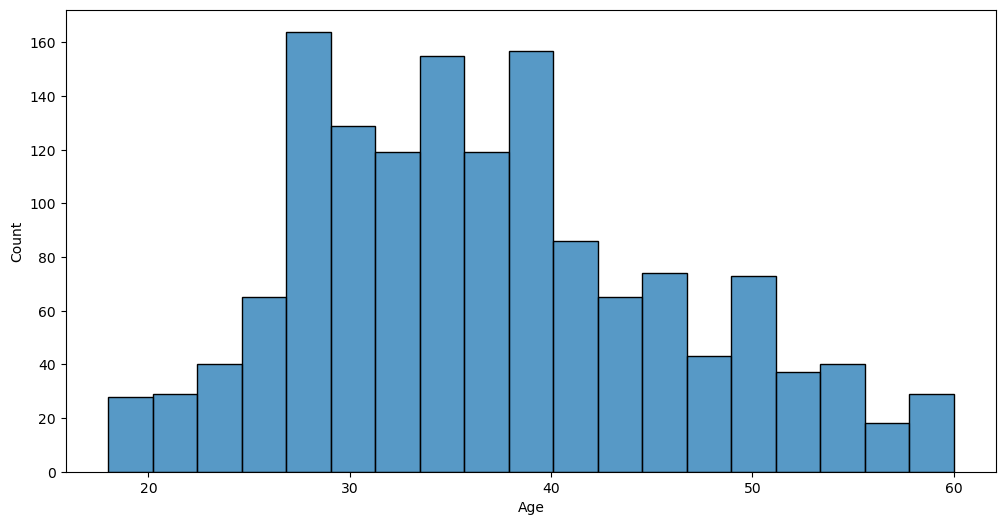

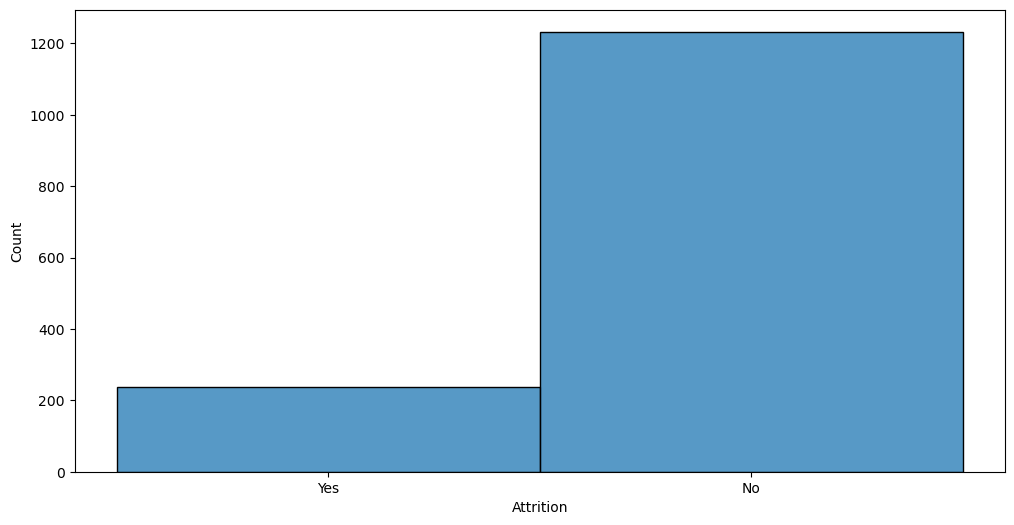

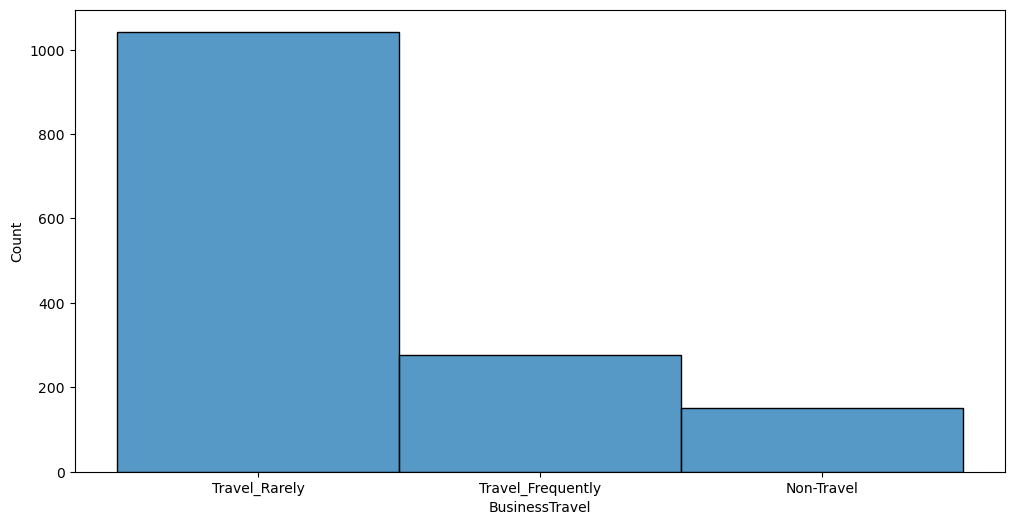

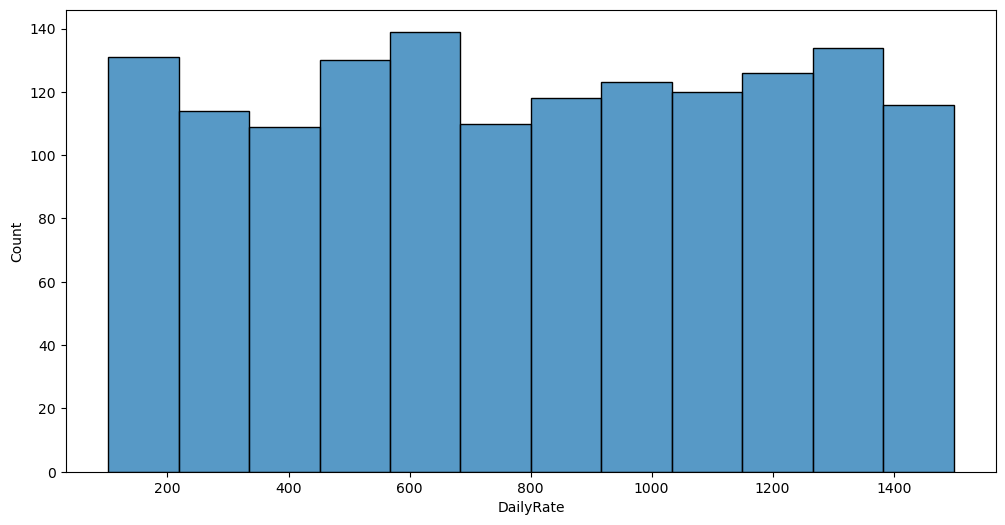

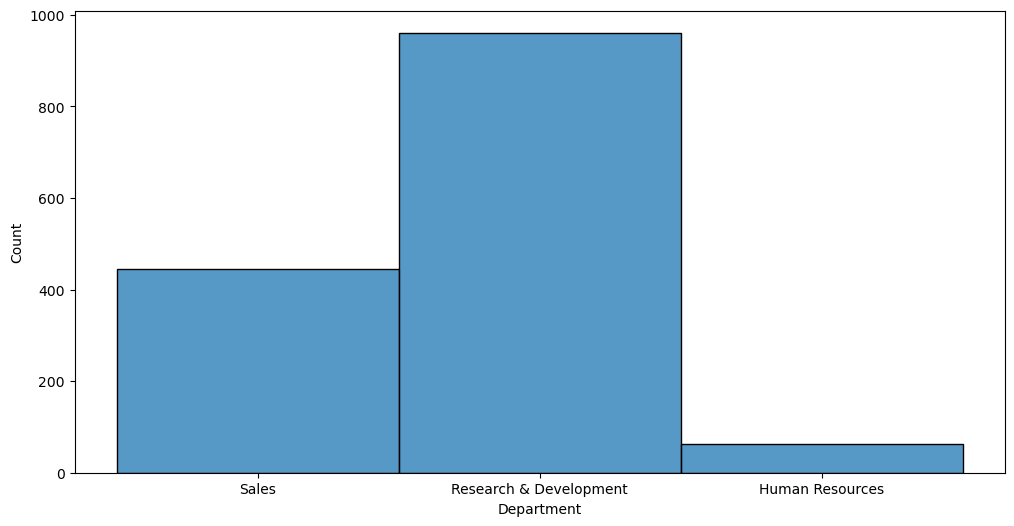

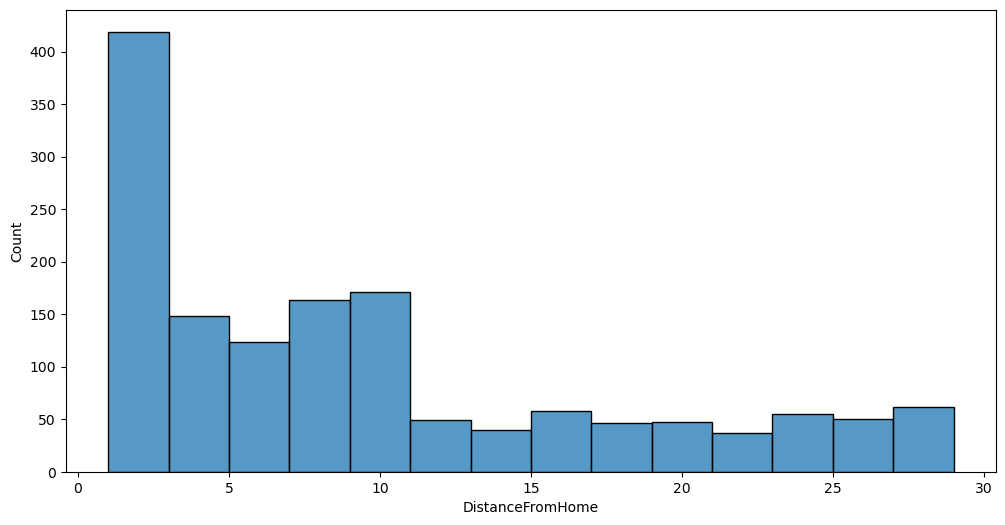

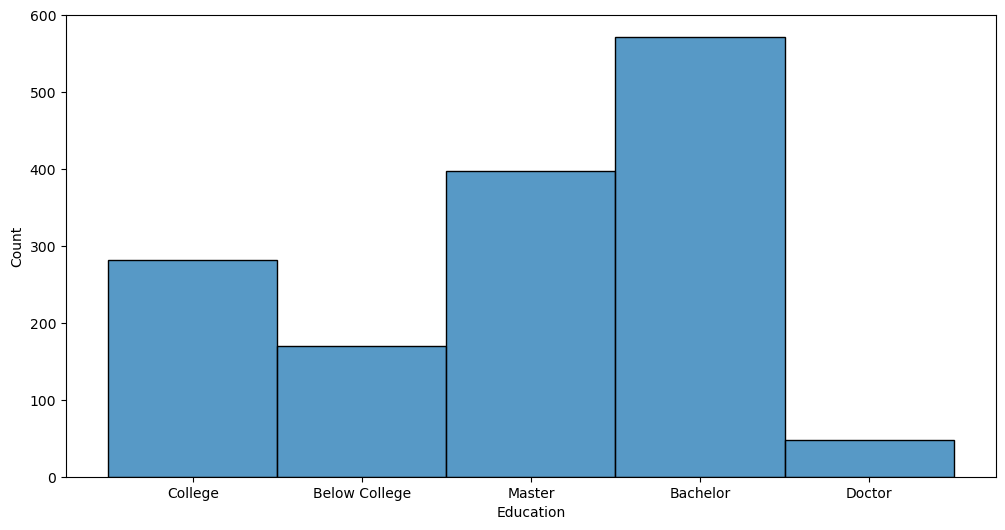

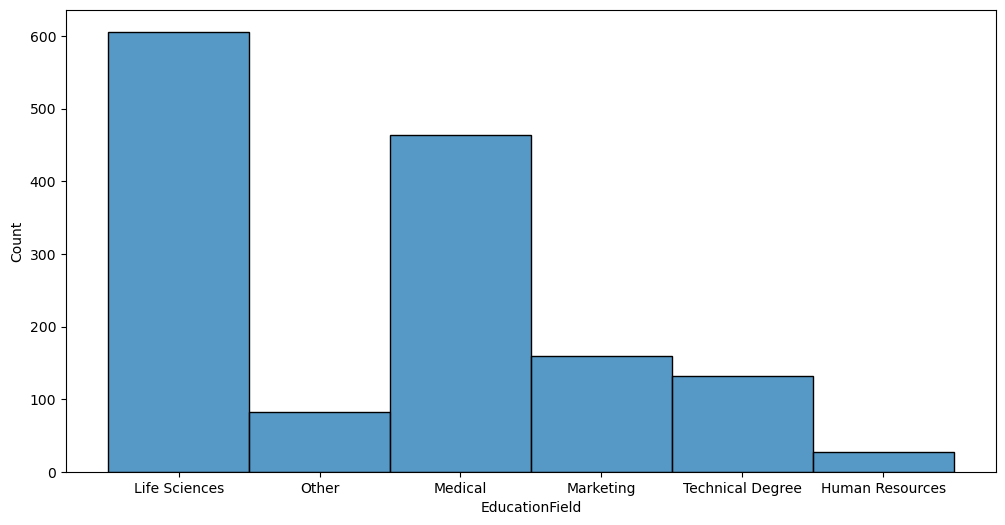

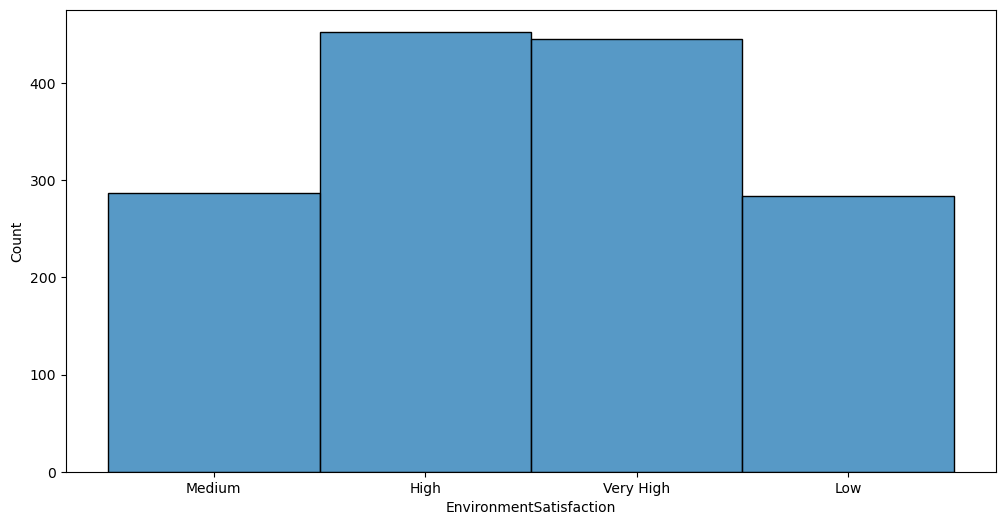

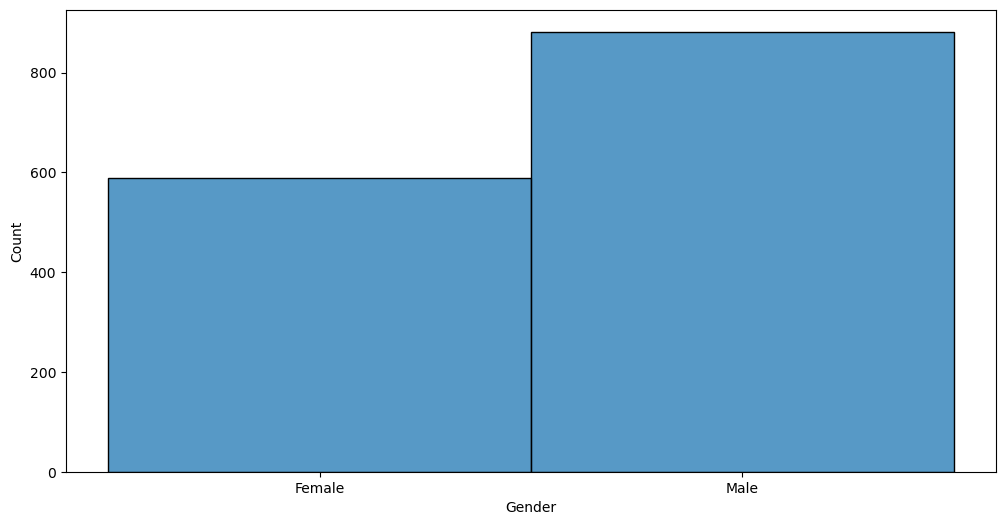

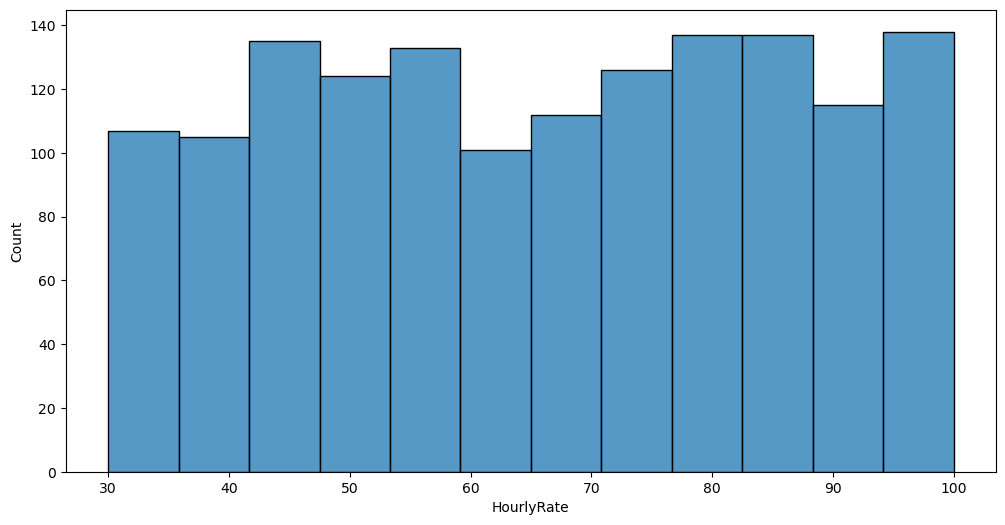

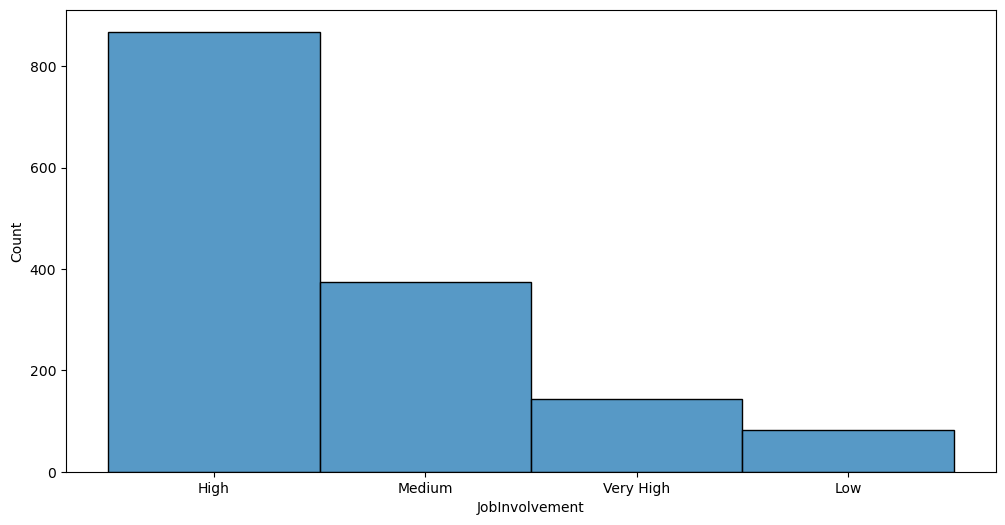

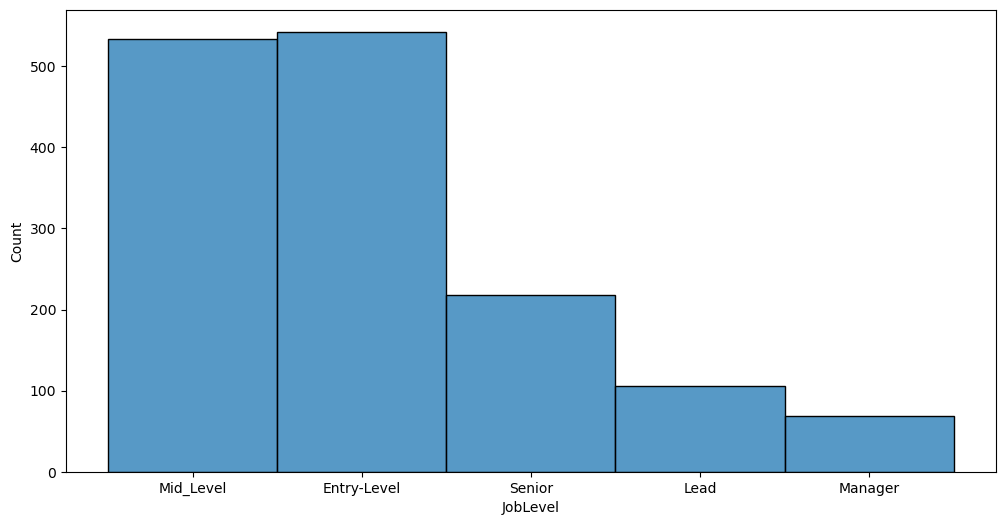

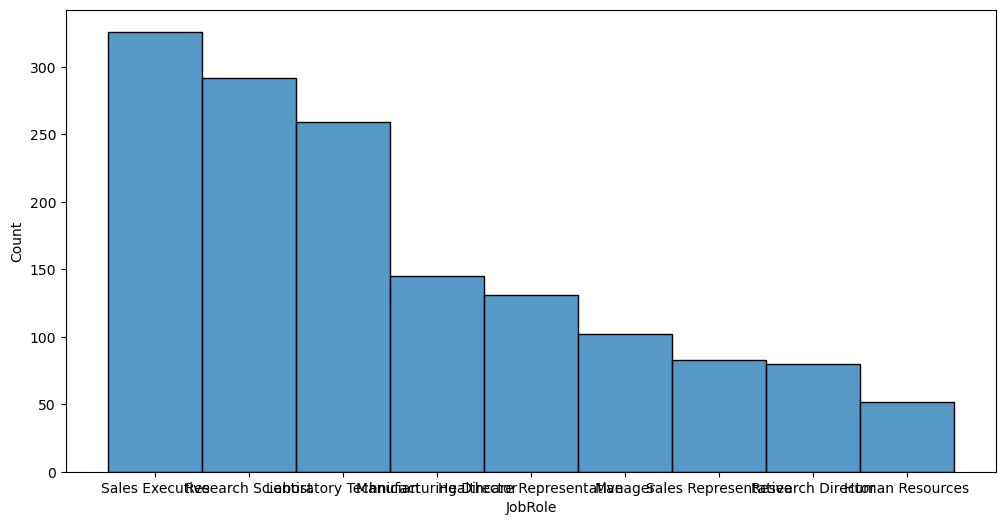

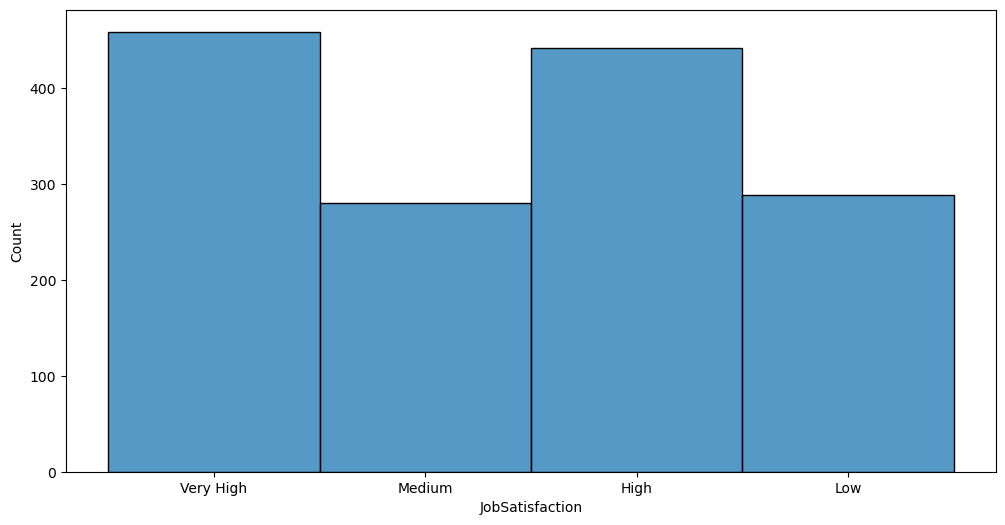

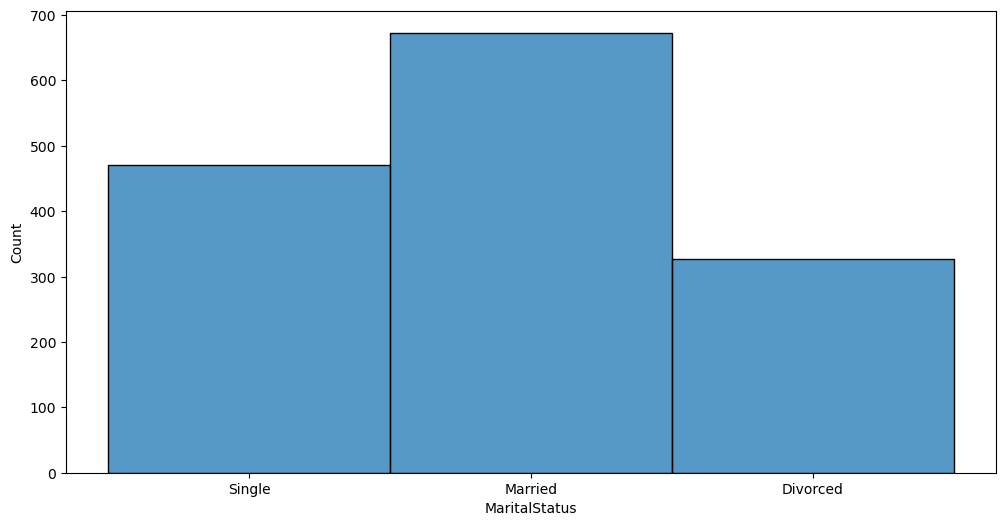

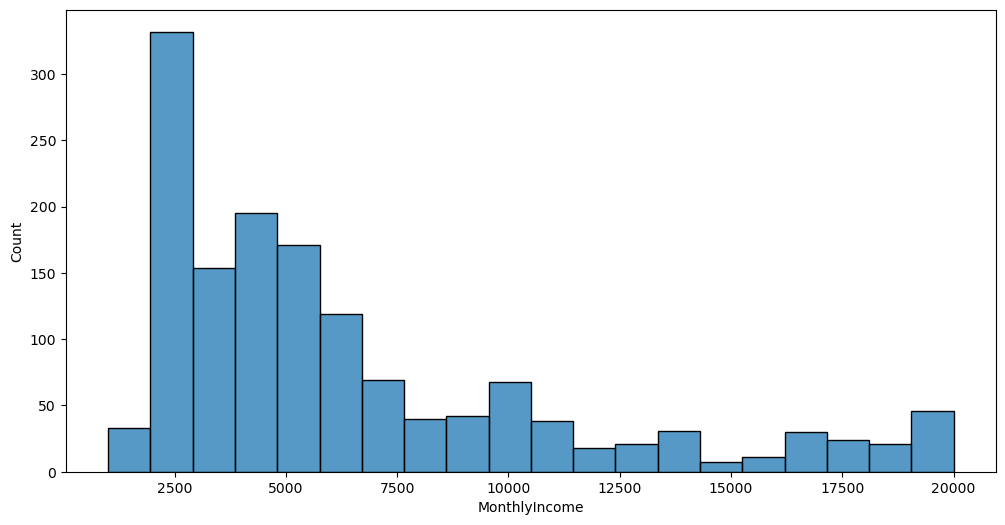

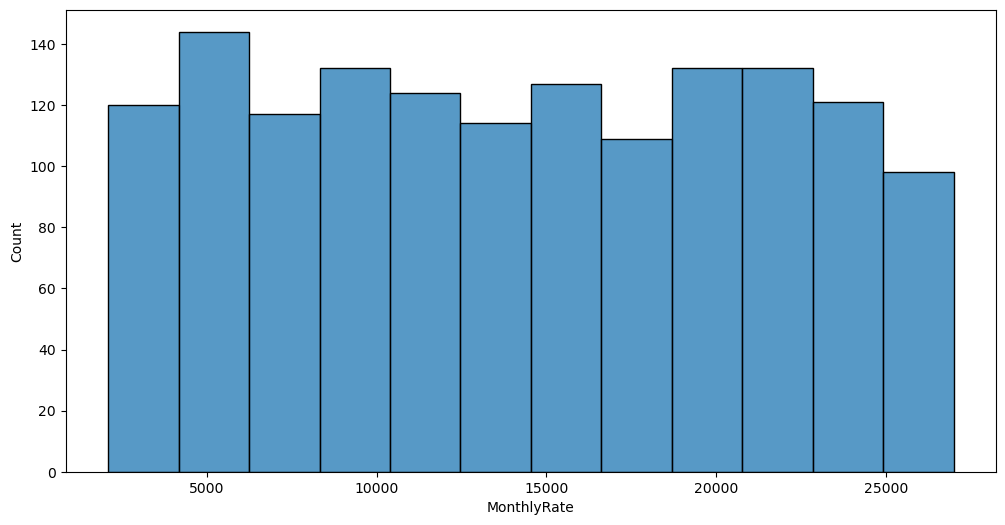

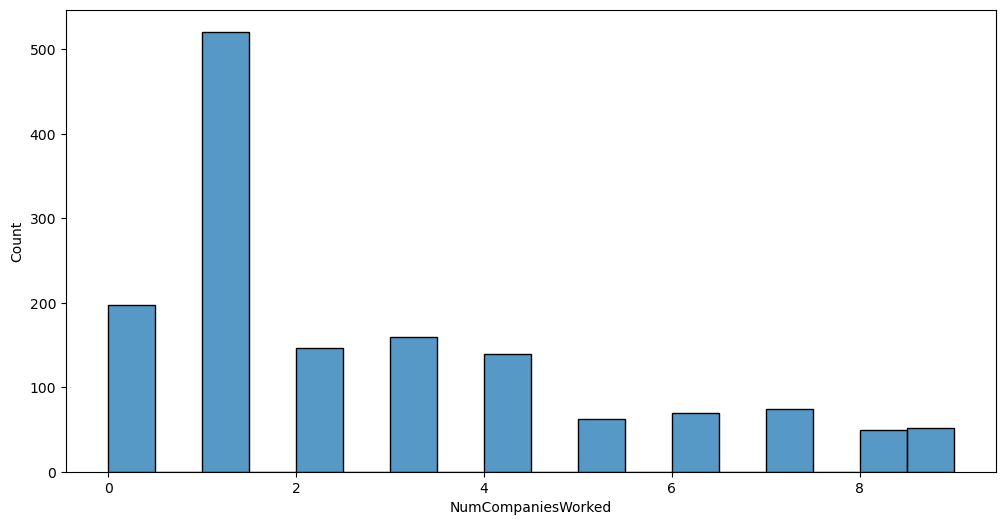

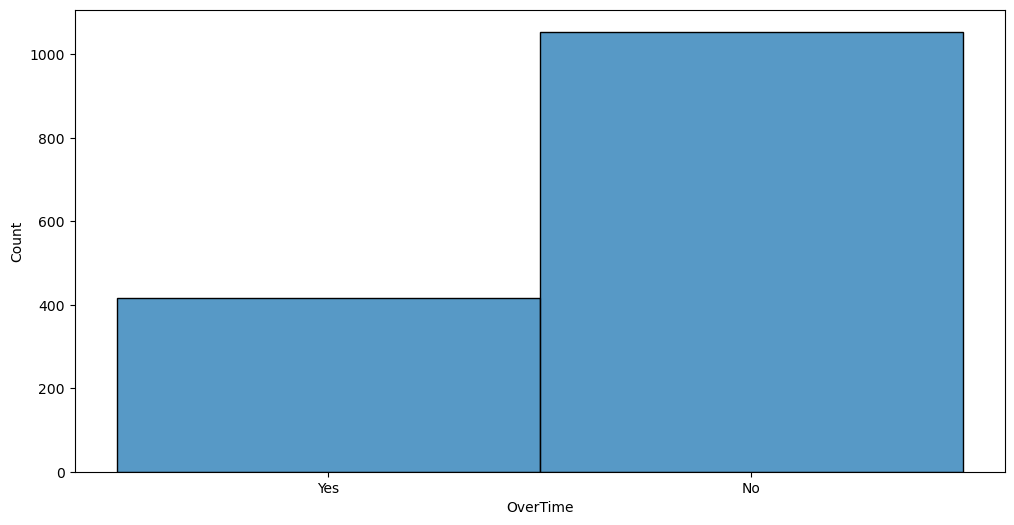

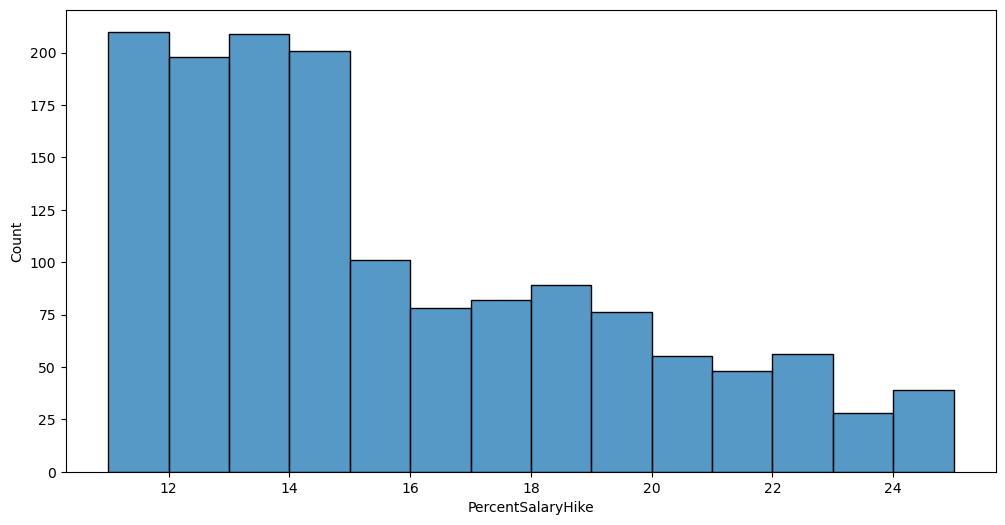

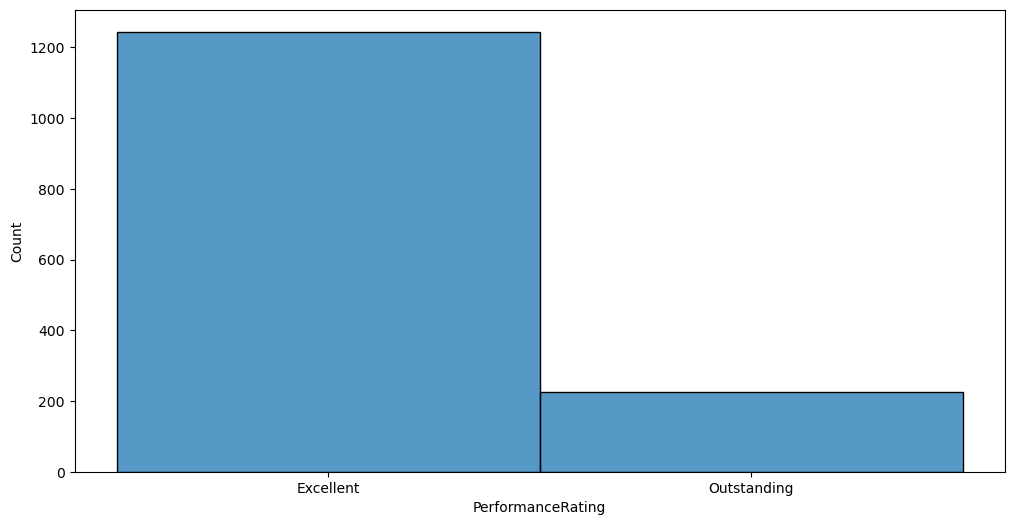

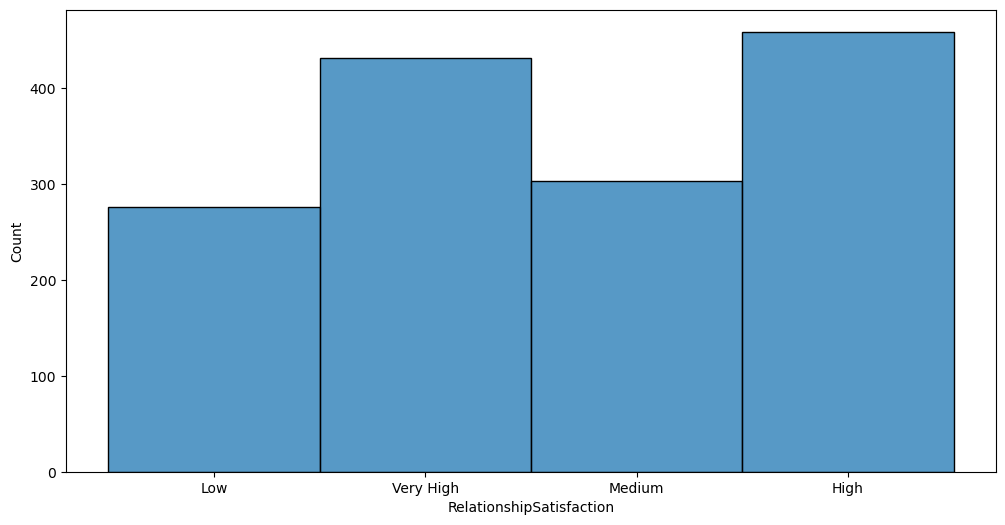

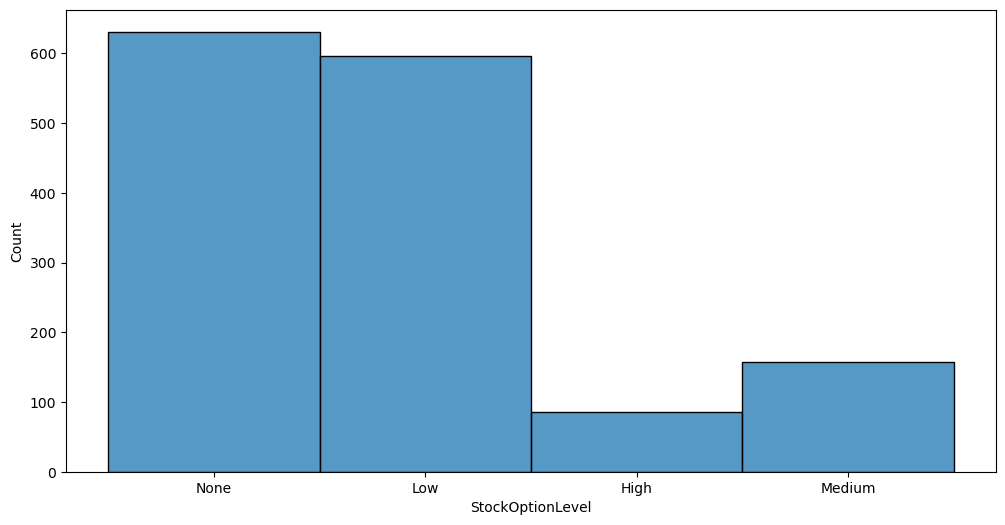

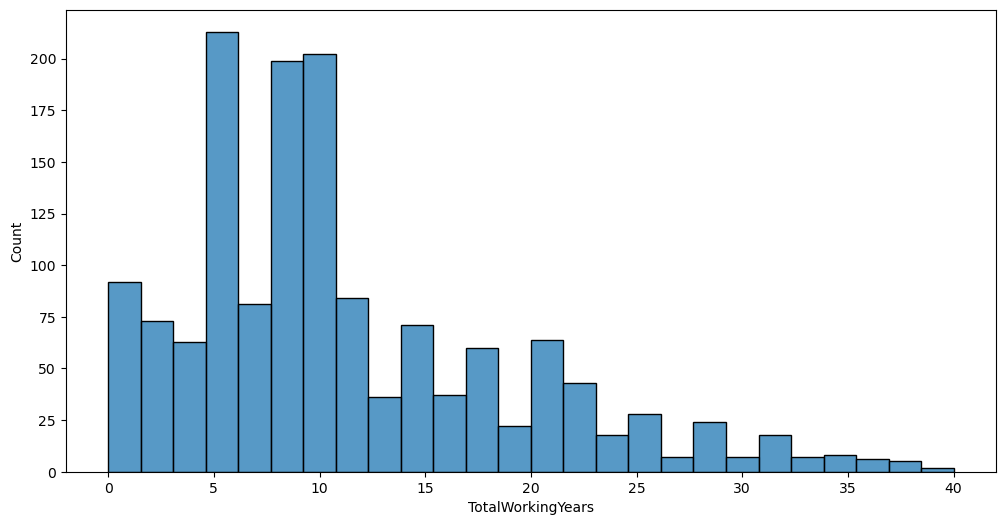

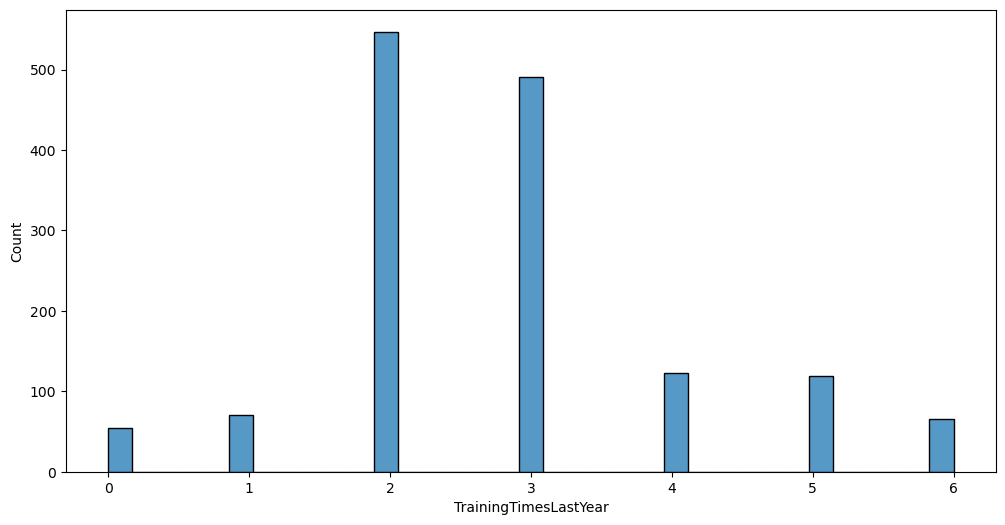

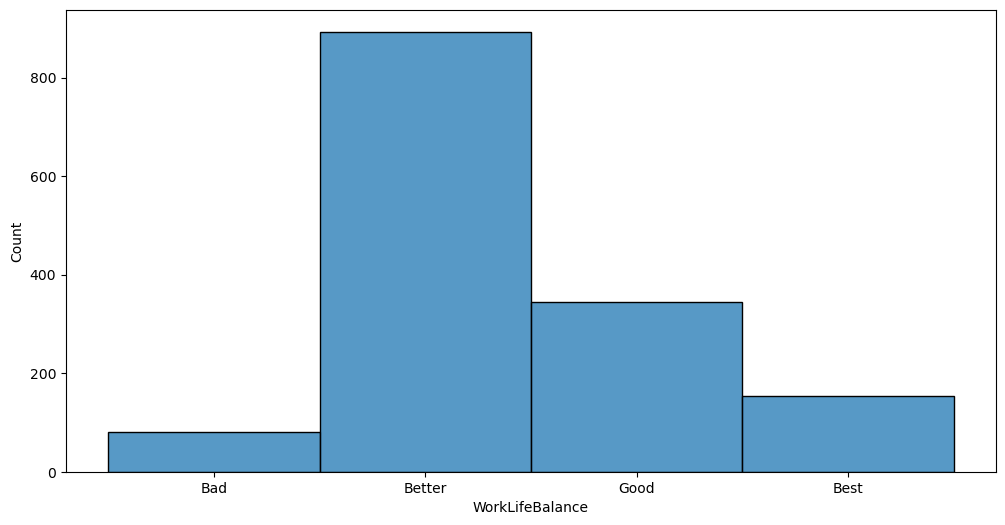

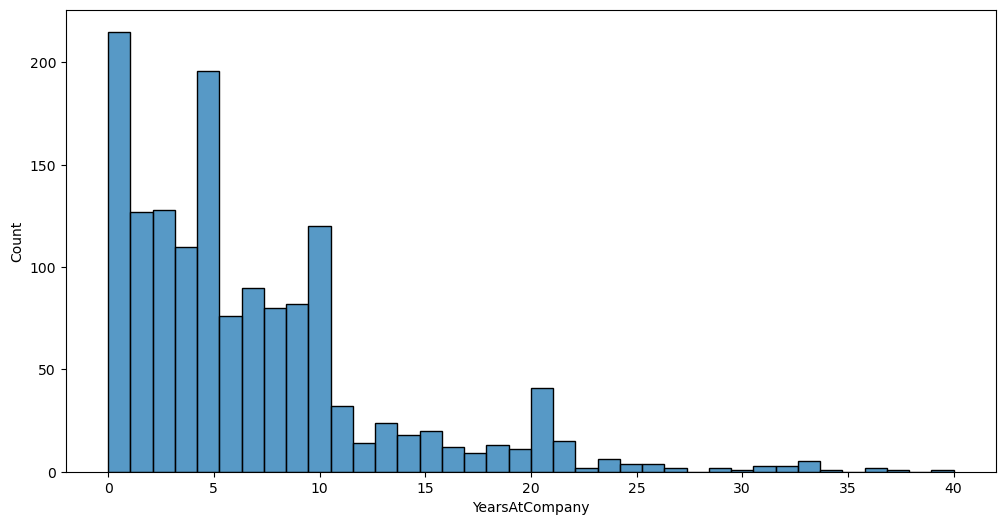

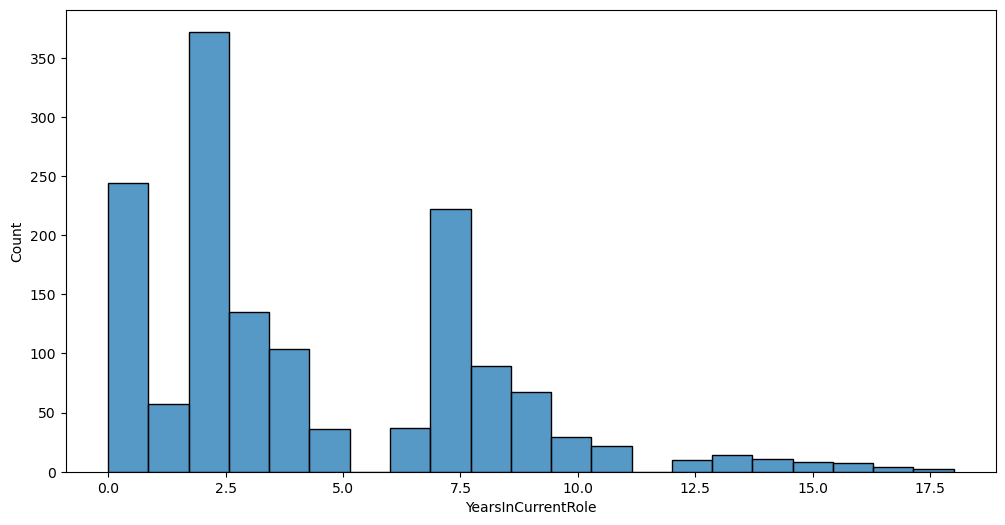

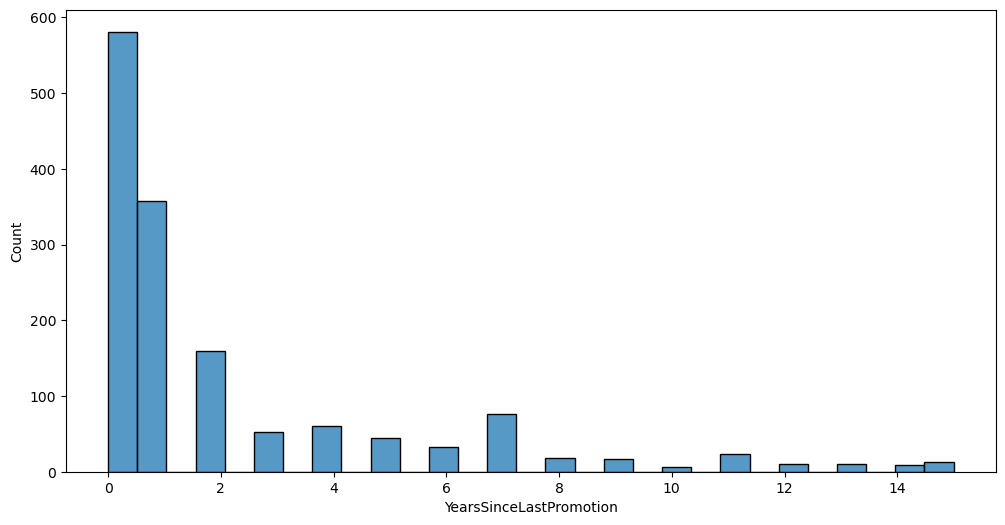

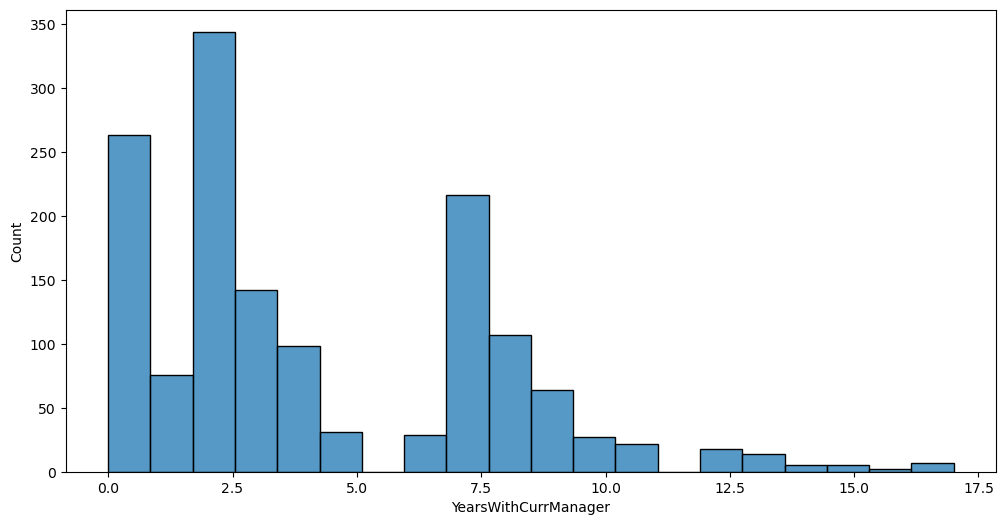

In [23]:
for col in df.columns:
    plt.figure(figsize=(12, 6)) 
    sns.histplot(df[col])
    plt.show()

*****************

## Data Analysis

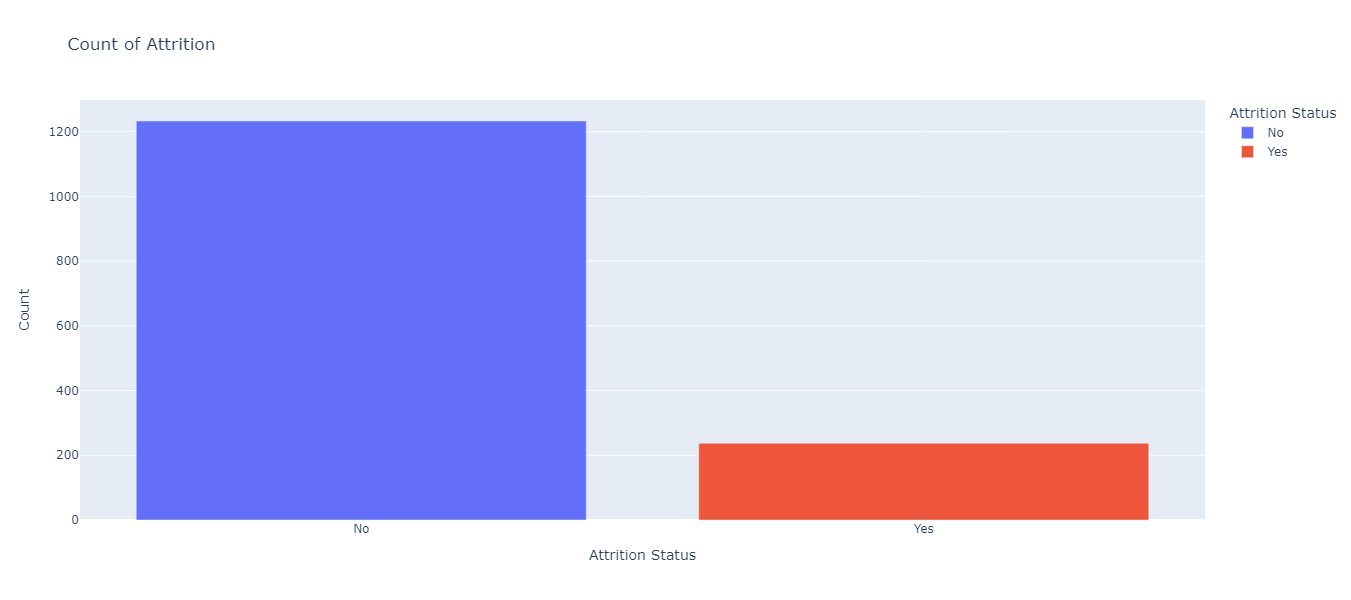

In [18]:
attrition_counts = df['Attrition'].value_counts().reset_index()
attrition_counts.columns = ['Attrition Status', 'Count']
fig = px.bar(attrition_counts, x='Attrition Status', y='Count', color='Attrition Status',
             title='Count of Attrition',height=600)
fig.show()

- While the number of employees leaving may appear low, it’s crucial to understand the underlying reasons for their departure. This analysis will explore those factors.
- Although the dataset shows an imbalance in the number of employees leaving versus those staying, this reflects a real-world scenario as In most organizations, the majority of employees stay, and only a minority leave at any given time. This creates an inherent imbalance in the data.

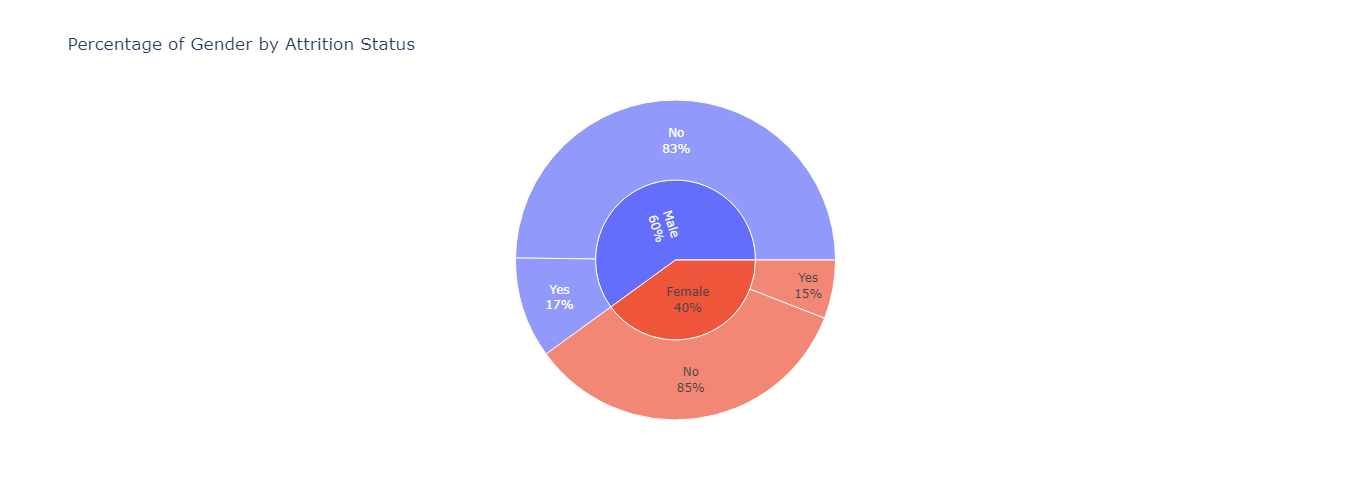

In [19]:
fig = px.sunburst(df, path=['Gender', 'Attrition'], height=500,title='Percentage of Gender by Attrition Status',)
fig = fig.update_traces(textinfo="label+percent parent")
fig.show()

- ***Gender*** has minimal impact, as the number of males leaving is *very similar* to that of females

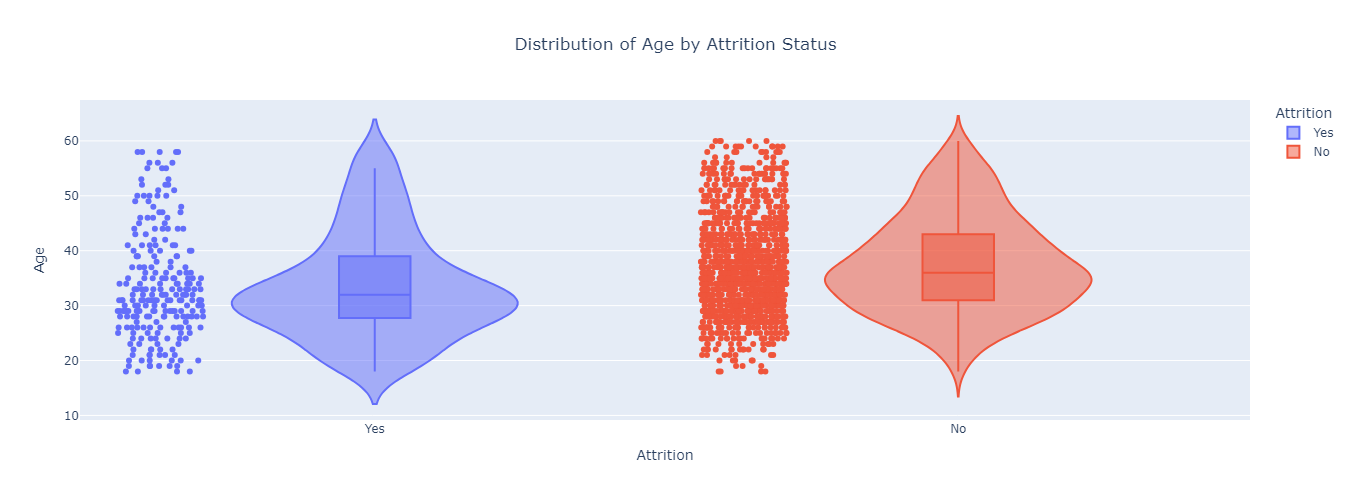

In [20]:
fig = px.violin(df, x='Attrition', y='Age', color='Attrition', 
                box=True, points="all",
                title='Distribution of Age by Attrition Status',
                labels={'Attrition': 'Attrition', 'Age': 'Age'},height=500)

fig.update_layout(
    title_x=0.5, 
)

fig.show()

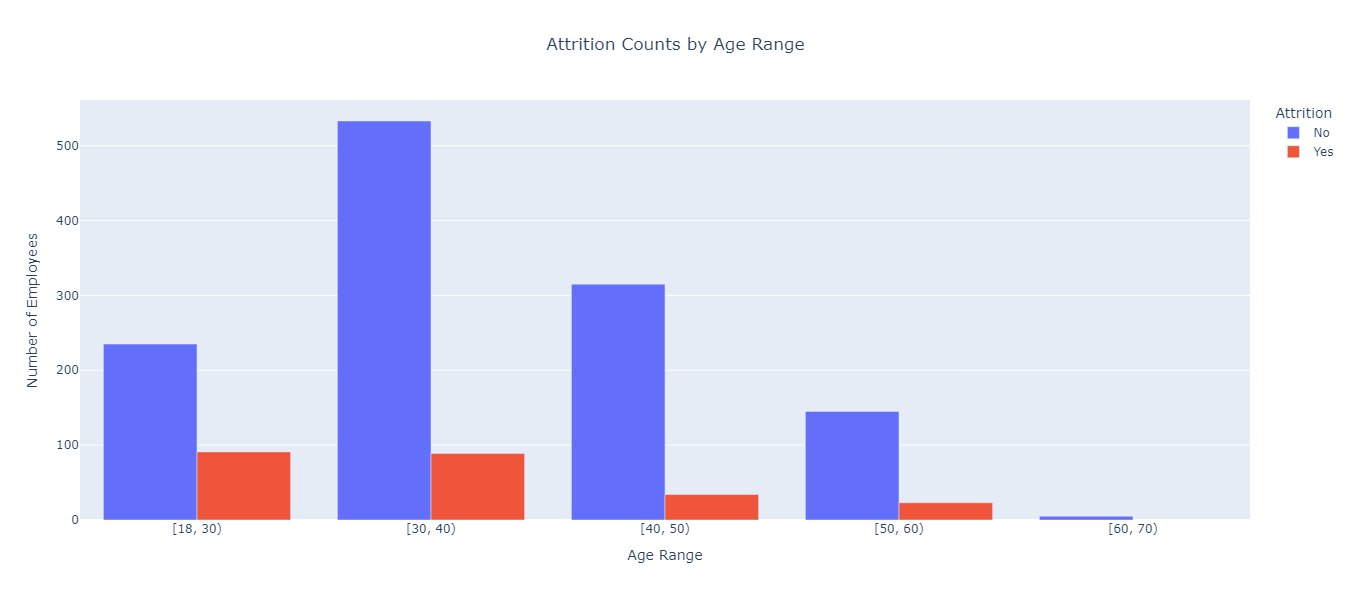

In [21]:
age_bins = [18, 30, 40, 50, 60, 70] 
df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, right=False)

df['AgeRange'] = df['AgeRange'].astype(str)

age_attrition_counts = df.groupby(['AgeRange', 'Attrition']).size().reset_index(name='Count')

fig = px.bar(age_attrition_counts, x='AgeRange', y='Count', color='Attrition', 
             title='Attrition Counts by Age Range',
             labels={'AgeRange': 'Age Range', 'Count': 'Number of Employees'},
             barmode='group',height=600)
df.drop(columns='AgeRange',inplace=True)

fig.update_layout(
    title_x=0.5, 
)

fig.show()

- The majority of attrition occurs among employees in their **30s and younger**

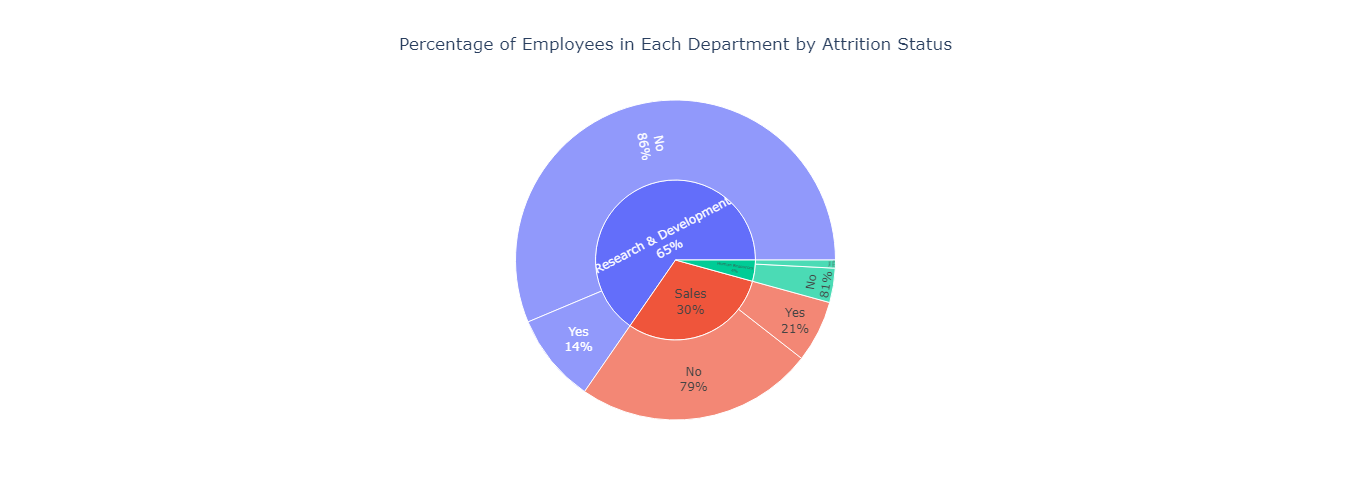

In [22]:
fig = px.sunburst(df, path=['Department', 'Attrition'], height=500,title='Percentage of Employees in Each Department by Attrition Status')
fig = fig.update_traces(textinfo="label+percent parent")
fig.update_layout(
    title_x=0.5, 
)

fig.show()

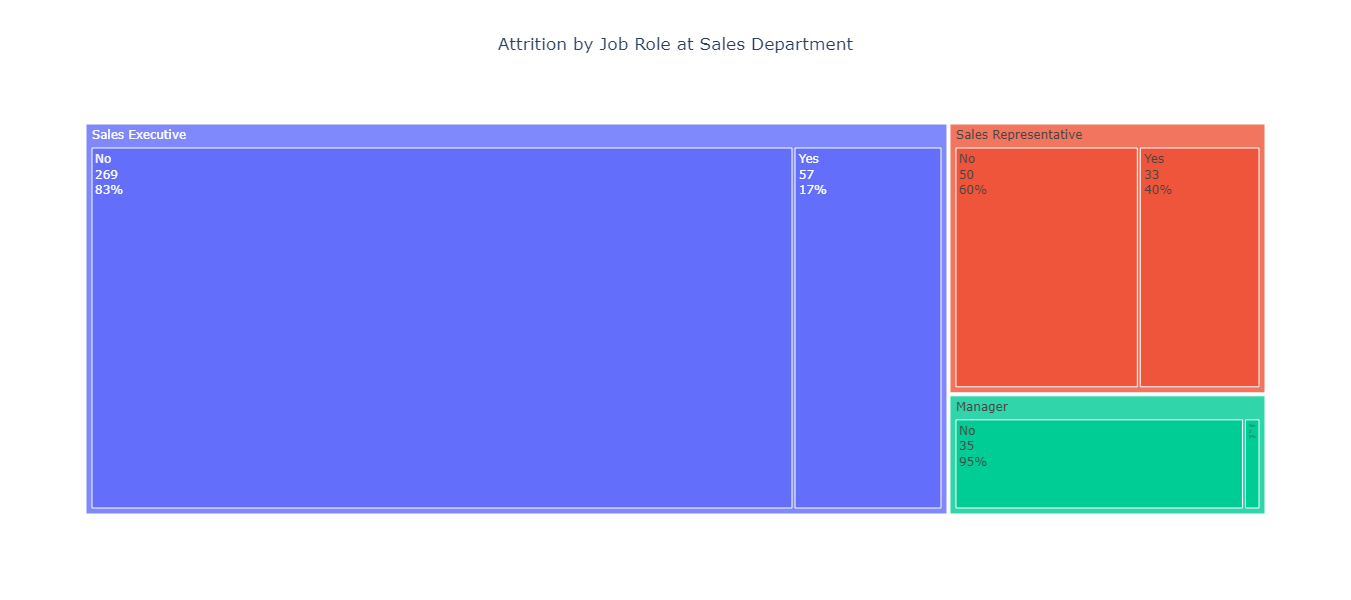

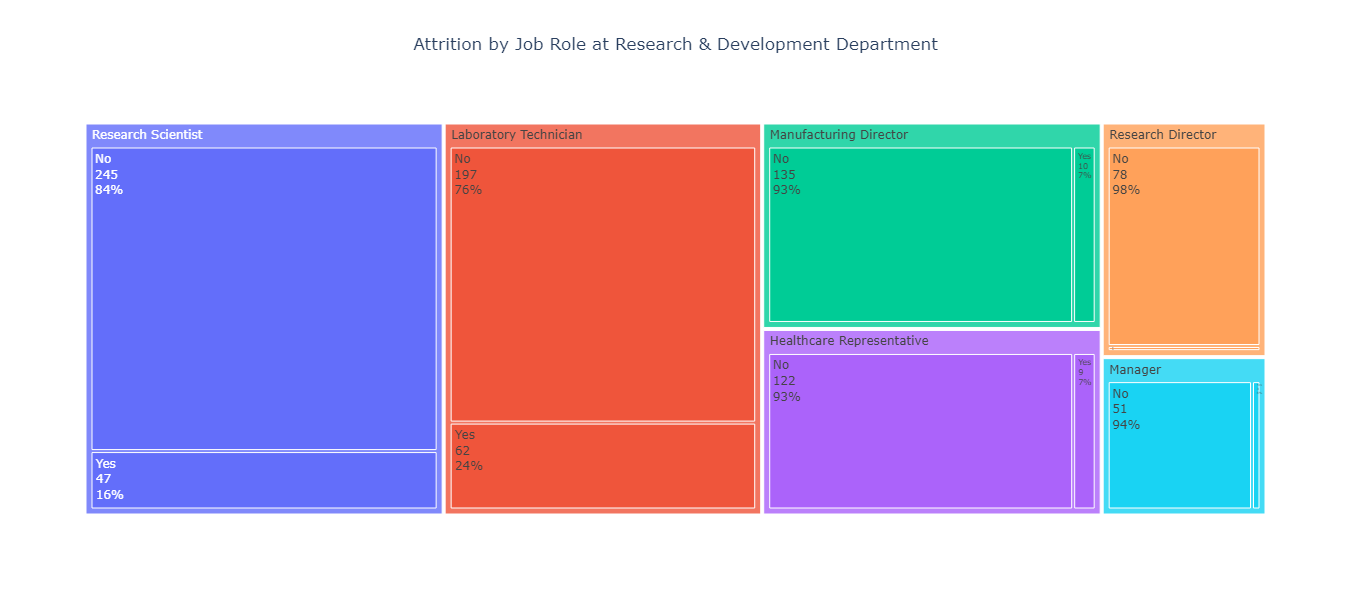

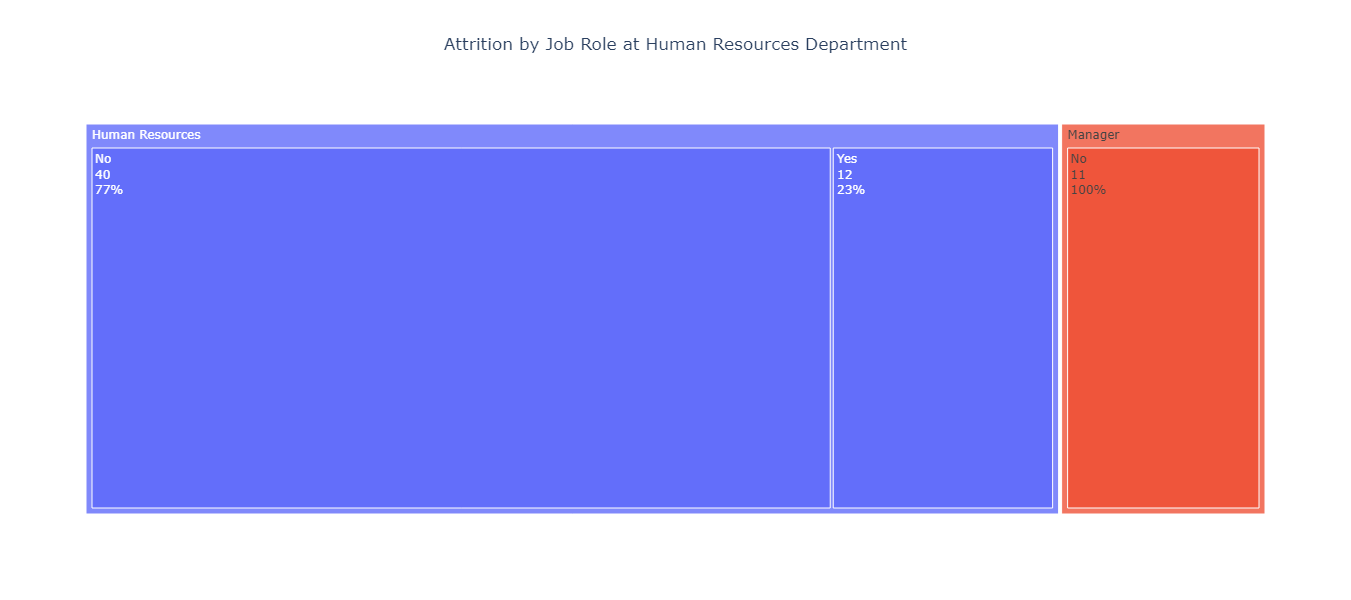

In [23]:
for val in df.Department.unique():
    attrition_counts = df[df['Department']==val].groupby(['JobRole', 'Attrition']).size().reset_index(name='count')
    fig = px.treemap(attrition_counts, path=['JobRole', 'Attrition'], values='count',
                     title=f'Attrition by Job Role at {val} Department',width=1300,height=600)
    fig.update_traces(textinfo="label+percent parent+value")
    fig.update_layout(
    title_x=0.5, 
)

    fig.show()

- The *highest number* of employees leaving are from the ***R&D Department***.
- The **Sales** and **HR** departments have a *higher percentage* of employees who chose to leave.
- The job role with the highest attrition is ***Laboratory Technician***.
- Additionally, **Sales** Representatives have a notably high attrition rate, with ***40%*** of them leaving.
- The average satisfaction levels **are almost the same** across all job roles, but ***less satisfied employees tend to leave.***

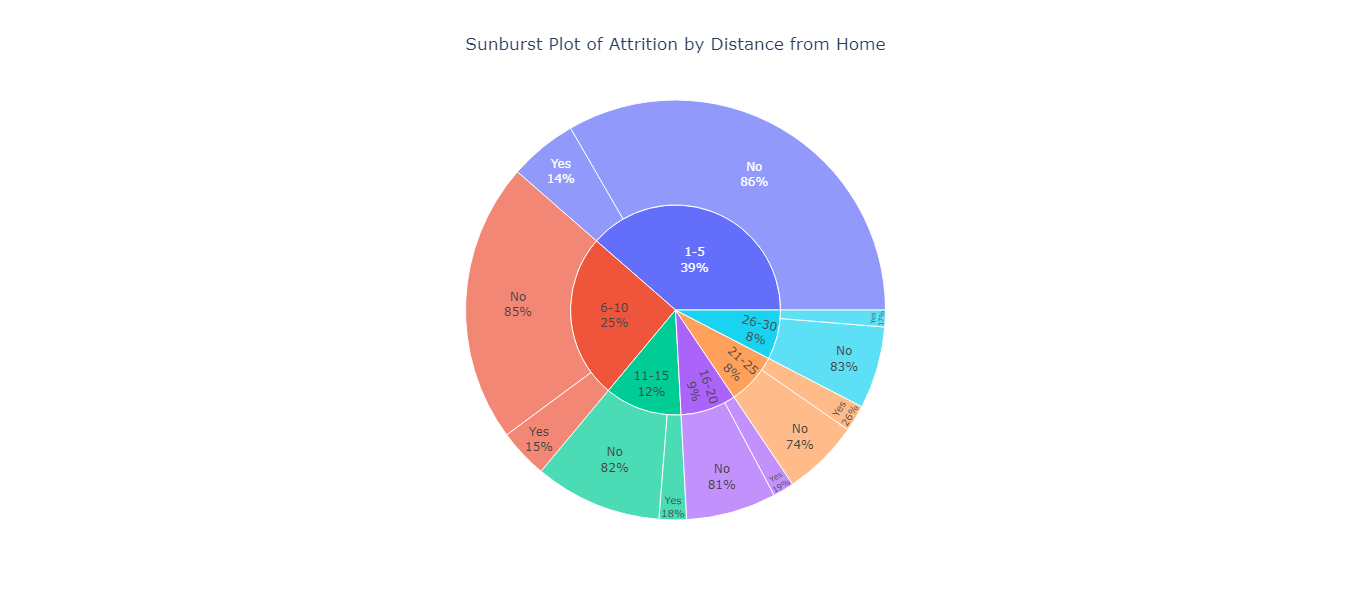

In [24]:
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
df['DistanceFromHomeBinned'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=False)
fig = px.sunburst(df, path=['DistanceFromHomeBinned', 'Attrition'],
                  title='Sunburst Plot of Attrition by Distance from Home',height=600)
fig = fig.update_traces(textinfo="label+percent parent")
df.drop(columns='DistanceFromHomeBinned',inplace=True)
fig.update_layout(
    title_x=0.5, 
)
fig.show()

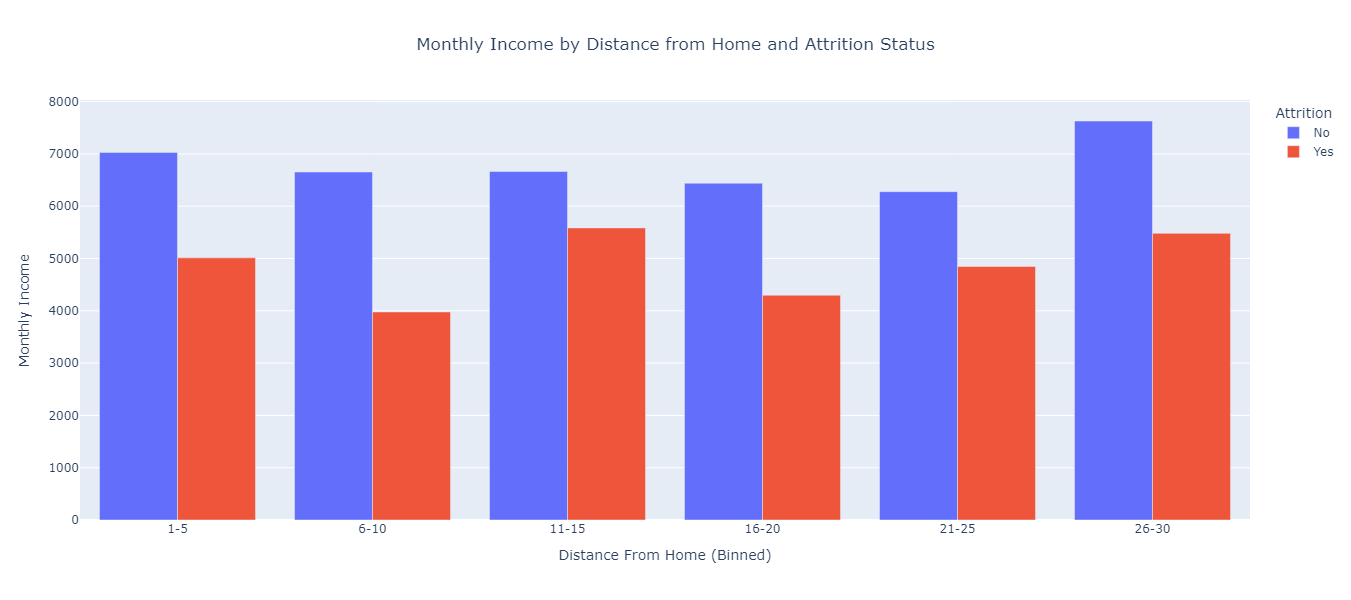

In [26]:
bins = [0, 5, 10, 15, 20, 25, 30]  
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']  

df['DistanceFromHomeBinned'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=False)
distance_attrition=df.groupby(['DistanceFromHomeBinned','Attrition'])['MonthlyIncome'].mean().reset_index()
distance_attrition

fig_bar = px.bar(distance_attrition, x='DistanceFromHomeBinned', y='MonthlyIncome', color='Attrition', 
                 title='Monthly Income by Distance from Home and Attrition Status',
                 labels={'DistanceFromHomeBinned': 'Distance From Home (Binned)', 'MonthlyIncome': 'Monthly Income'},
                 barmode='group', height=600)
fig_bar.update_layout(
    title_x=0.5, 
)

fig_bar.show()

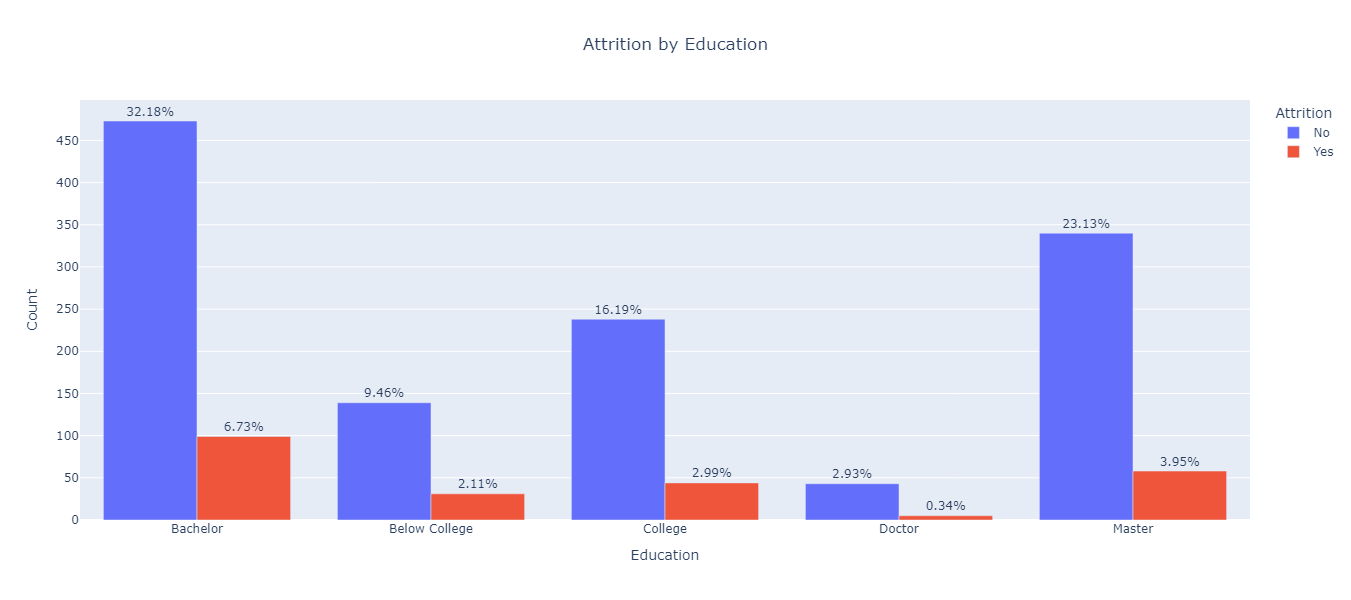

In [27]:
edu = df.groupby(['Education', 'Attrition']).size().reset_index(name='Count')
edu['Percentage'] = edu['Count'] / edu['Count'].sum() * 100
fig = px.bar(edu, x='Education', y='Count', color='Attrition',
             title='Attrition by Education',
             barmode='group', height=600,
             text=edu['Percentage'].round(2)) 
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(
    title_x=0.5, 
)
fig.show()

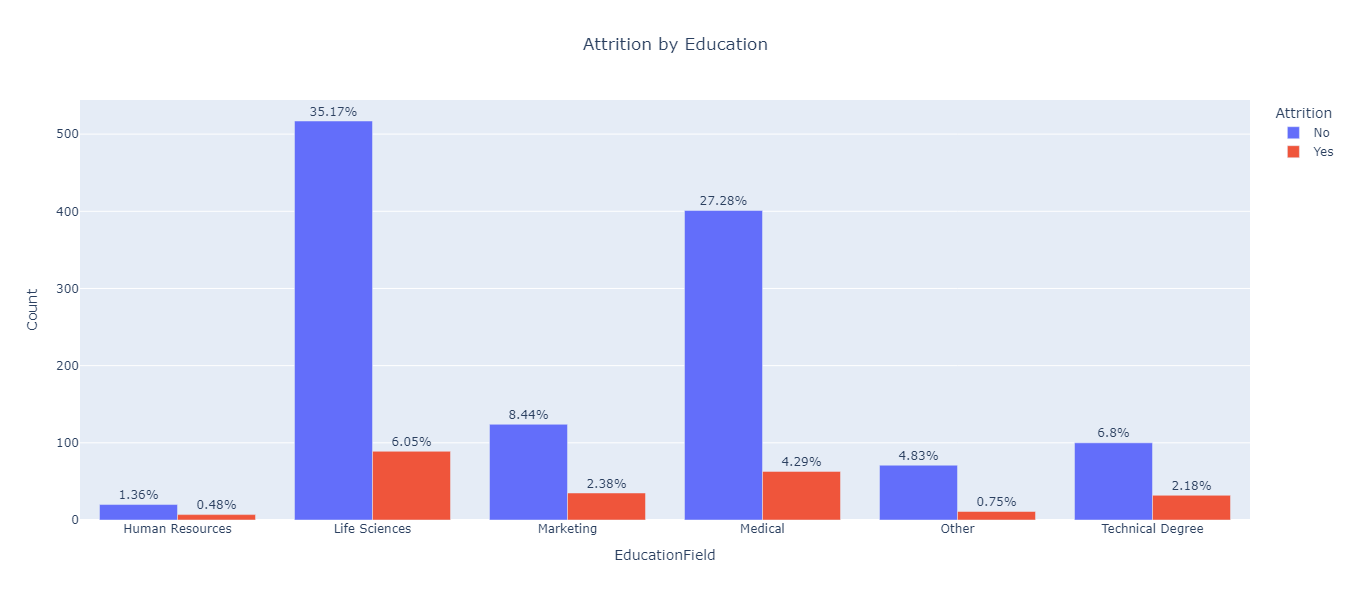

In [28]:
edu = df.groupby(['EducationField', 'Attrition']).size().reset_index(name='Count')
edu['Percentage'] = edu['Count'] / edu['Count'].sum() * 100
fig = px.bar(edu, x='EducationField', y='Count', color='Attrition',
             title='Attrition by Education',
             barmode='group', height=600,
             text=edu['Percentage'].round(2)) 
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(
    title_x=0.5, 
)
fig.show()

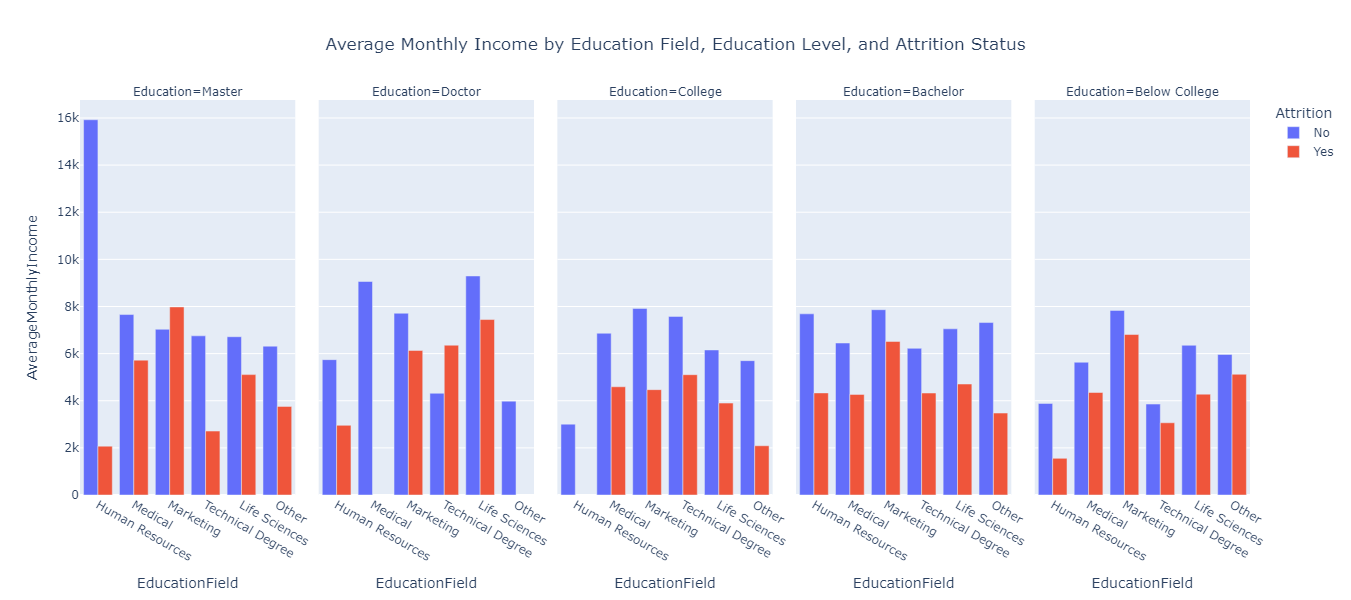

In [29]:
edu_income = df.groupby(['EducationField', 'Education', 'Attrition'])['MonthlyIncome'].mean().reset_index(name='AverageMonthlyIncome')

edu_income = edu_income.sort_values(by='AverageMonthlyIncome', ascending=False)

fig = px.bar(edu_income, x='EducationField', y='AverageMonthlyIncome', color='Attrition',
             facet_col='Education', 
             title='Average Monthly Income by Education Field, Education Level, and Attrition Status',
             barmode='group', height=600)
fig.update_layout(
    title_x=0.5, 
)

fig.show()

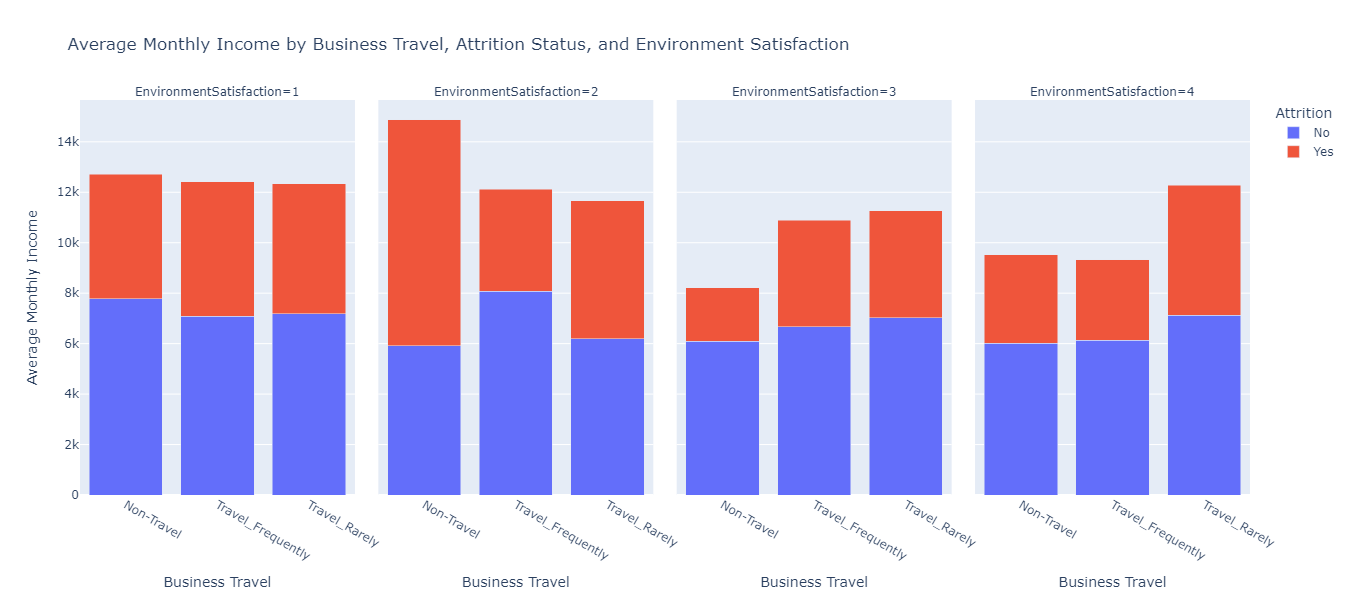

In [30]:
sats_avf = df.groupby(['BusinessTravel', 'Attrition', 'EnvironmentSatisfaction'])['MonthlyIncome'].mean().reset_index(name='AverageMonthlyIncome')


fig = px.bar(sats_avf, x='BusinessTravel', y='AverageMonthlyIncome', color='Attrition',
             facet_col='EnvironmentSatisfaction', 
             title='Average Monthly Income by Business Travel, Attrition Status, and Environment Satisfaction',
             labels={'BusinessTravel': 'Business Travel', 'AverageMonthlyIncome': 'Average Monthly Income'},
             barmode='stack', height=600)


fig.show()

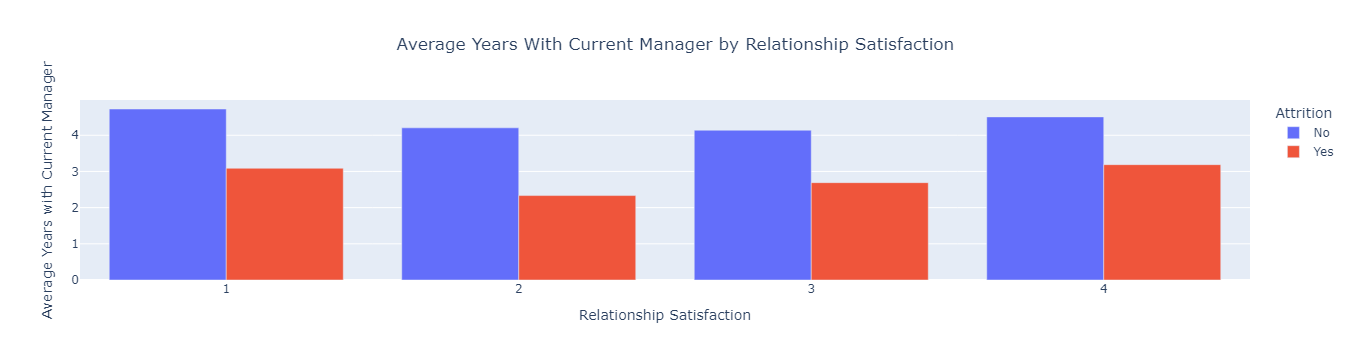

In [31]:
grouped_df =  df.groupby(['RelationshipSatisfaction','Attrition'])['YearsWithCurrManager'].mean().reset_index()

fig = px.bar(grouped_df, x='RelationshipSatisfaction', y='YearsWithCurrManager',color='Attrition',
             title='Average Years With Current Manager by Relationship Satisfaction',
             labels={'YearsWithCurrManager': 'Average Years with Current Manager', 
                     'RelationshipSatisfaction': 'Relationship Satisfaction'},
                barmode='group' )
fig.update_layout(
    title_x=0.5, 
)
fig.show()

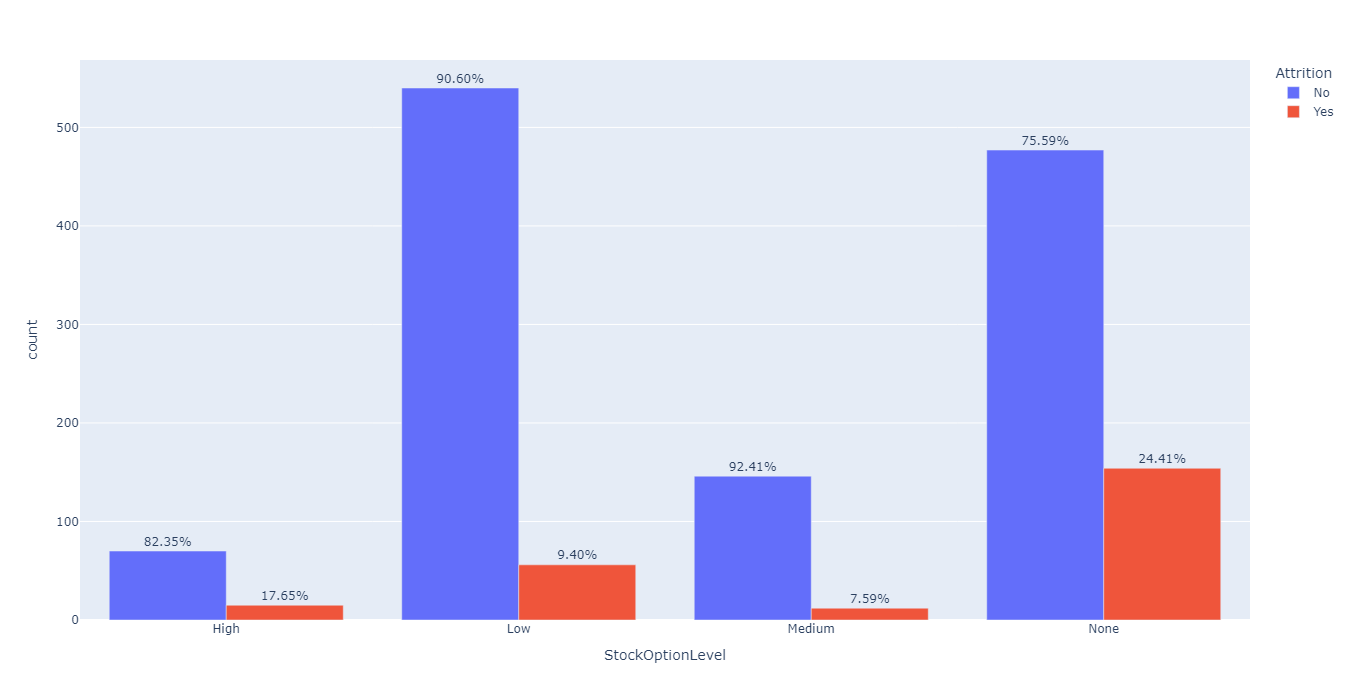

In [32]:
stock = df.groupby(['StockOptionLevel', 'Attrition']).size().reset_index(name='count')
stock['percent'] = stock['count'] / stock.groupby('StockOptionLevel')['count'].transform('sum') * 100

fig = px.bar(stock, x='StockOptionLevel', y='count', barmode='group', height=700,
             color='Attrition', text=stock['percent'].apply(lambda x: '{0:1.2f}%'.format(x)),
             )
fig.update_traces(textposition='outside')
fig.show()


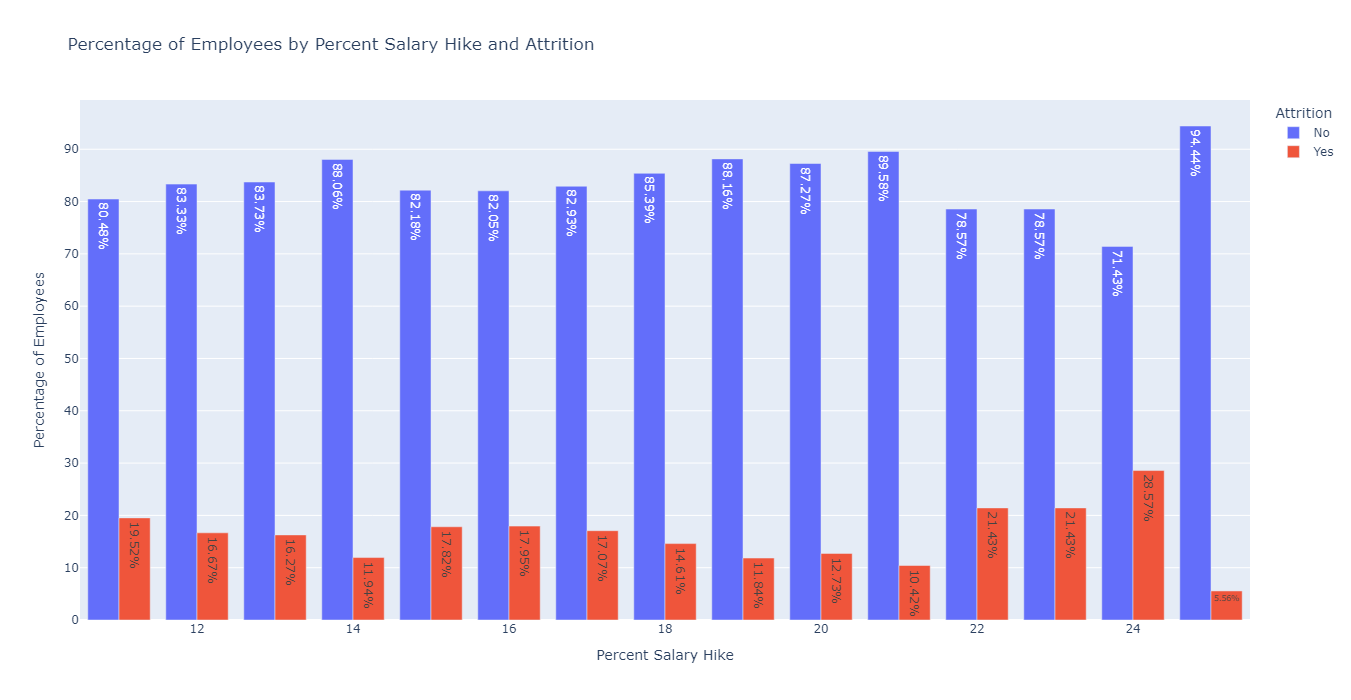

In [33]:
hike = df.groupby(['PercentSalaryHike', 'Attrition']).size().reset_index(name='count')
hike['percent'] = hike.groupby('PercentSalaryHike')['count'].apply(lambda x: 100 * x / x.sum()).values

fig = px.bar(hike, x='PercentSalaryHike', y='percent', height=700,
             color='Attrition',barmode='group',
             text=hike['percent'].apply(lambda x: '{:.2f}%'.format(x)),
             title='Percentage of Employees by Percent Salary Hike and Attrition')

fig.update_layout(
    xaxis_title='Percent Salary Hike',
    yaxis_title='Percentage of Employees',
    
)

fig.show()

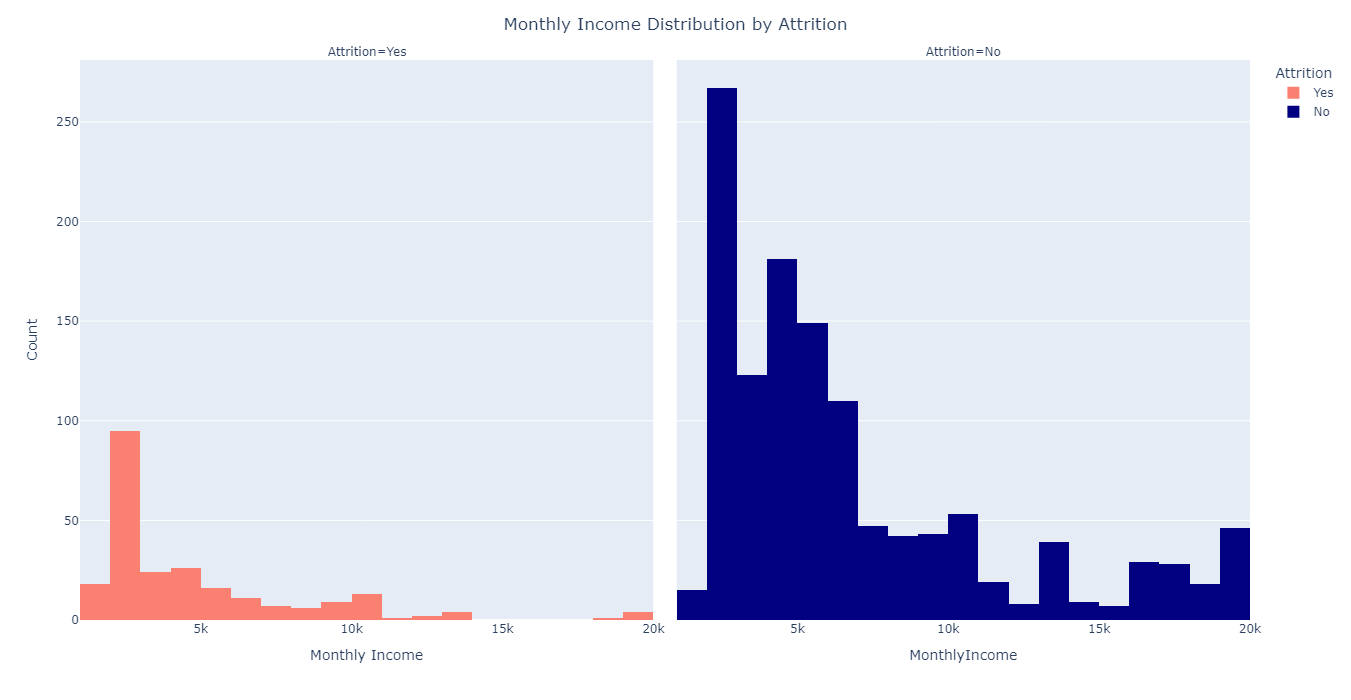

In [40]:
custom_colors = ['salmon', 'navy']

fig = px.histogram(df,x='MonthlyIncome',color='Attrition',
                   facet_col='Attrition',color_discrete_sequence=custom_colors, 
                   height=700)

fig.update_layout(
    title='Monthly Income Distribution by Attrition',
    title_x=0.5,
    xaxis_title='Monthly Income',
    yaxis_title='Count',
    legend_title='Attrition'
)

fig.show()

- Employees with no stock options are more likely to leave the company
- Employees with a high percentage salary hike are less likely to leave the company
- **25%** of employees with monthly income less than 4K leave the company
- Monthly income appears to be a key factor in employee attrition, as the majority of those who choose to leave the company have a monthly income of less than $3,000

### Strategies to Retain Employees:
- **Increase Salary**: Young employees often switch companies for better pay. By offering competitive salaries, we can encourage them to stay.

- **Enhance Stock Options**: Providing more stock options can be an effective incentive to retain employees.

- **Conduct Surveys**: We should conduct surveys to identify what aspects of the work environment employees find unfavorable, allowing us to address their concerns.

- **Transportation Solutions**: Offering transportation, such as buses to and from work, could improve employee satisfaction.

### Benefits of Our Retention Strategy:
- **Increased Productivity**: Retaining experienced employees leads to higher productivity.
- **Cost Savings**: Avoiding turnover reduces the costs and time associated with recruiting and training new employees.
- **Enhanced Reputation**: A stable workforce improves the company's reputation, which can positively impact stock prices.

-------------------------------------

## Handing Outliers

In [25]:
numerical_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

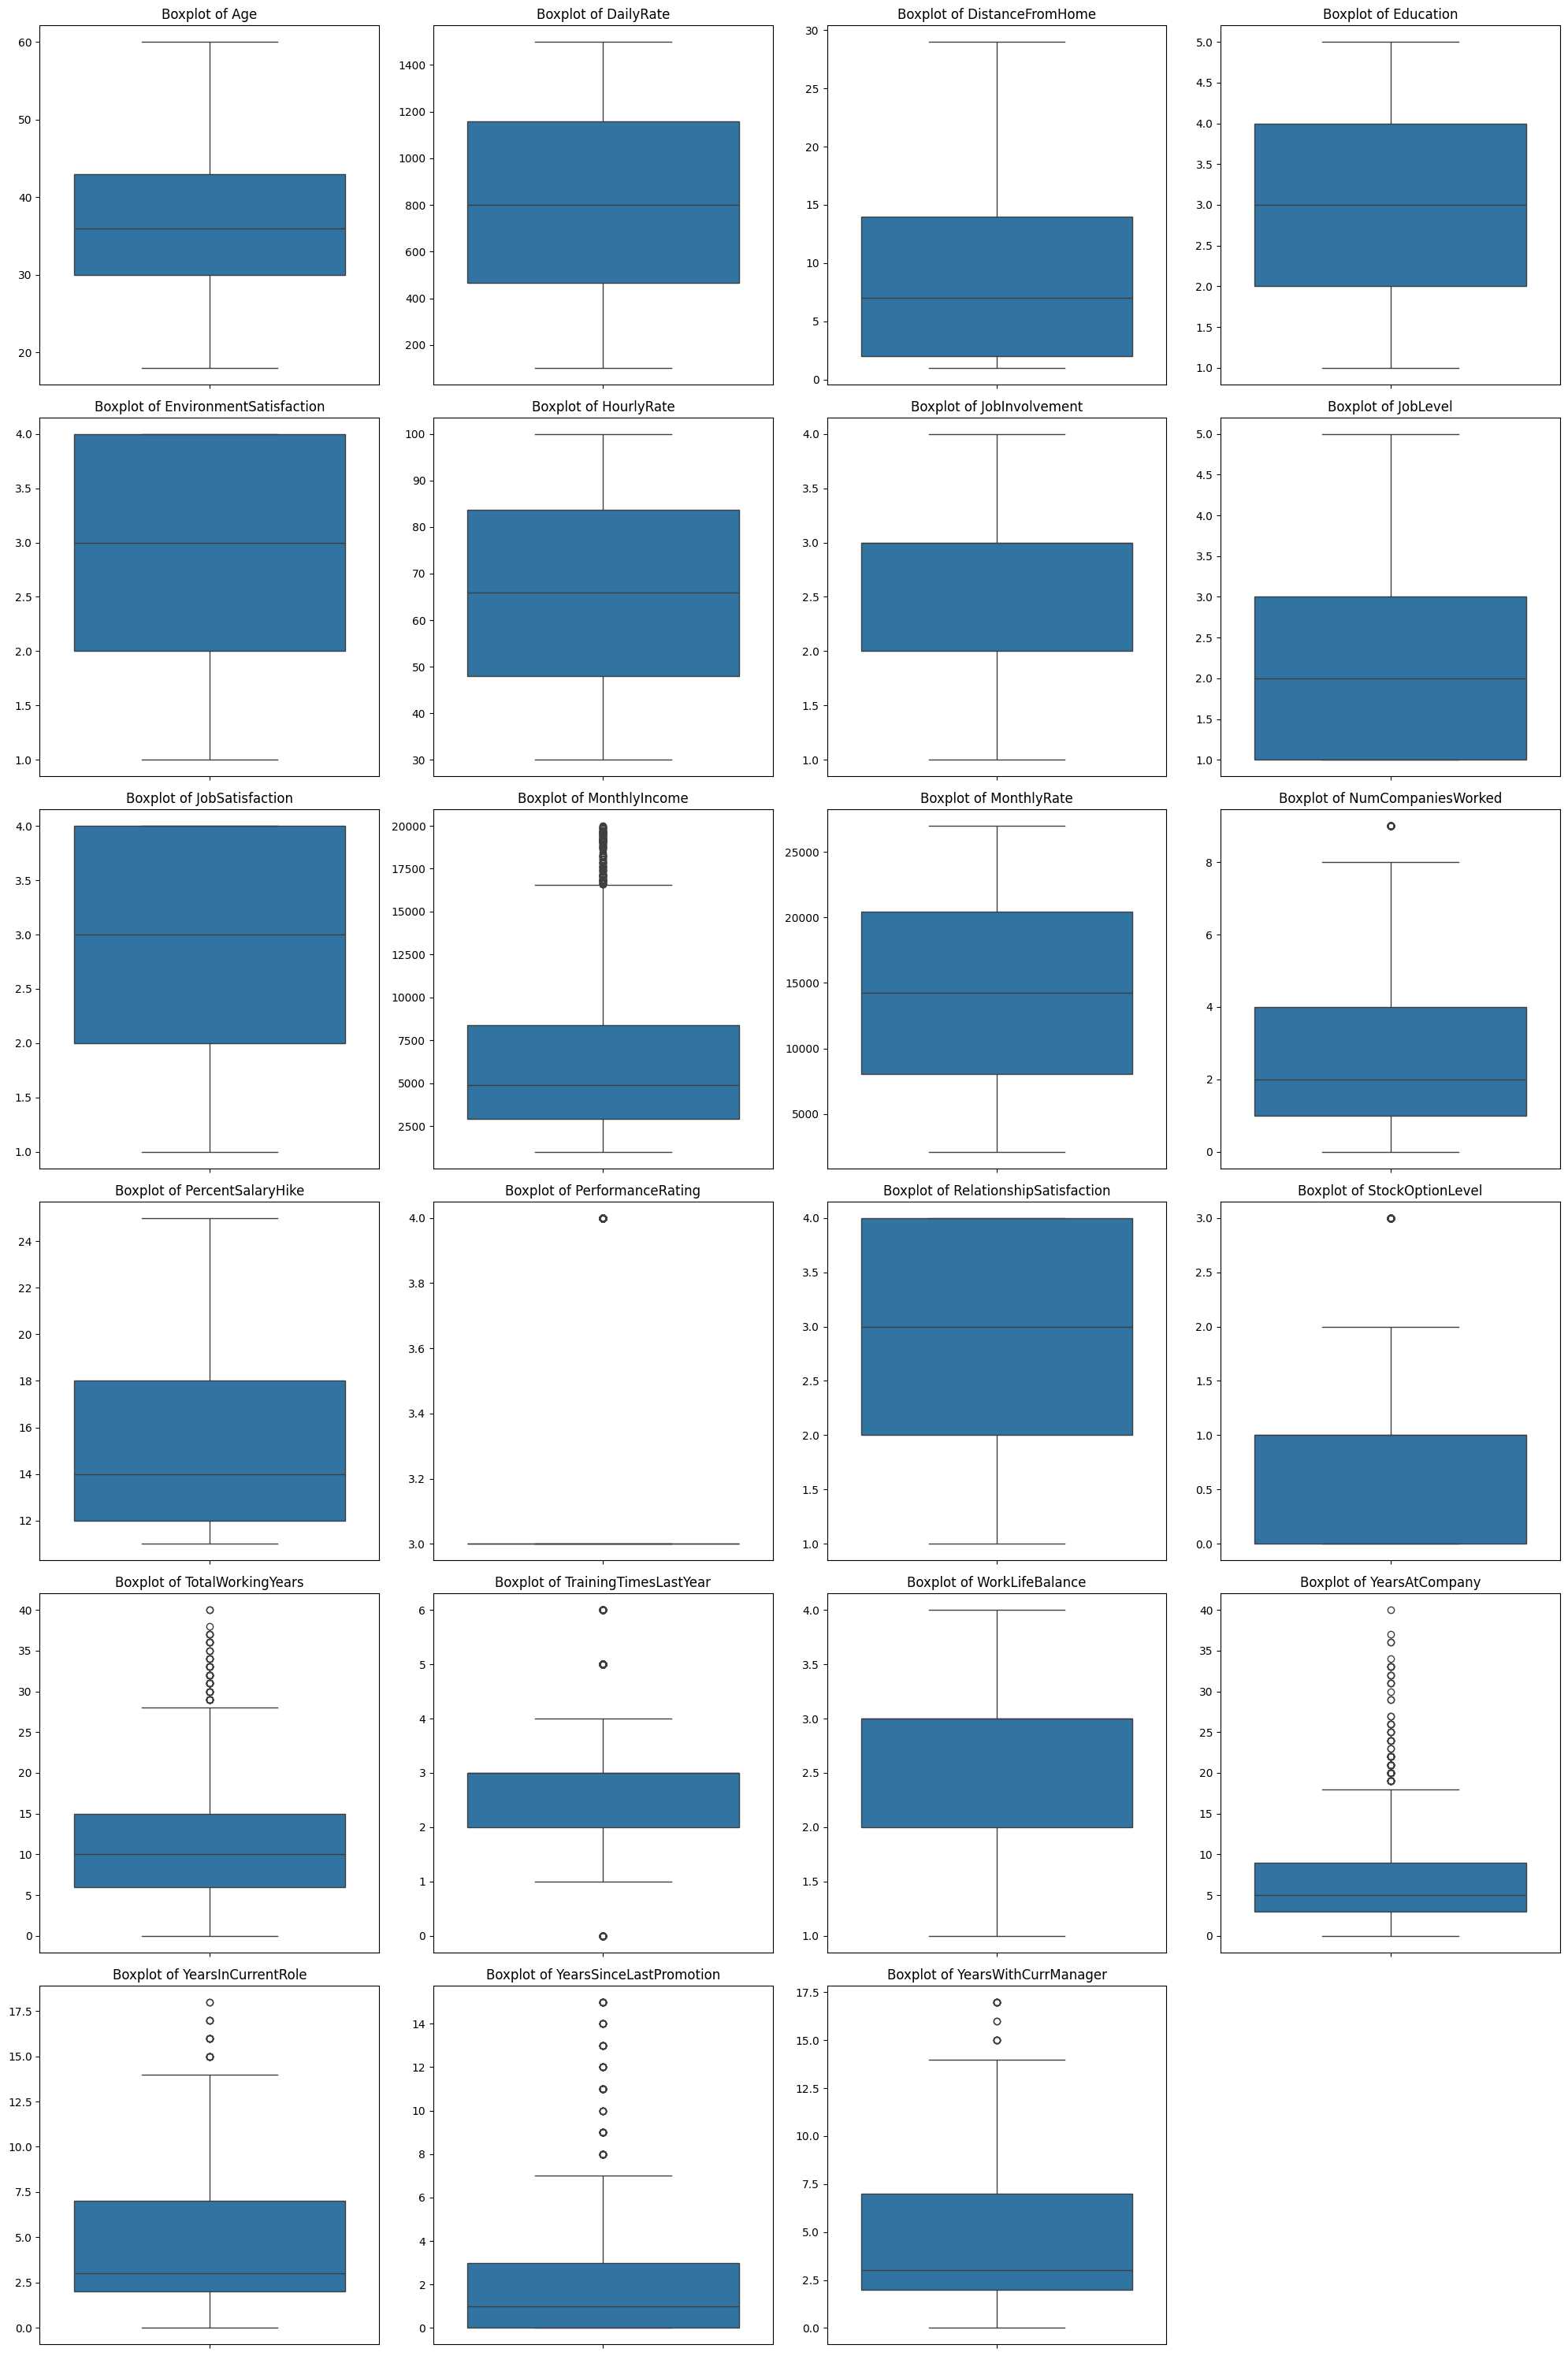

In [20]:
max_cols = 4

num_cols = len(numerical_cols)
num_rows = int(np.ceil(num_cols / max_cols))

fig, axes = plt.subplots(num_rows, max_cols, figsize=(5 * max_cols, 5 * num_rows))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_original[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('')  


for j in range(num_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

***********************

## Feature Engineering 

In [10]:
# df_orginal = df_IQR.copy()
# df_orginal = df_drop_outliers.copy()

In [41]:
df_original.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [42]:
numerical_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [43]:
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [44]:
df_original.sample(3)

Age Attrition BusinessTravel  DailyRate              Department  \
27     42        No  Travel_Rarely        691                   Sales   
846    35        No  Travel_Rarely        819  Research & Development   
1449   32        No  Travel_Rarely        529  Research & Development   

      DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
27                   8          4         Marketing                        3   
846                  2          3     Life Sciences                        3   
1449                 2          3  Technical Degree                        4   

     Gender  ...  PerformanceRating  RelationshipSatisfaction  \
27     Male  ...                  3                         4   
846    Male  ...                  3                         2   
1449   Male  ...                  3                         4   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
27                   1                10                      2   
846                  1                15                      2   
1449                 0                 4                      4   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
27                 3               9                   7   
846                4               7                   7   
1449               3               4                   2   

      YearsSinceLastPromotion YearsWithCurrManager  
27                          4                    2  
846                         6                    4  
1449                        1                    2  

[3 rows x 31 columns]

In [171]:
df_original['TotalWorkingYears'] = pd.to_numeric(df_original['TotalWorkingYears'], errors='coerce')
bins = [0, 5, 10, 20, df_original['TotalWorkingYears'].max() + 1]
labels = ['Junior', 'Mid', 'Senior', 'Director']
df_original['ExperienceLevel'] = pd.cut(df_original['TotalWorkingYears'], bins=bins, labels=labels, include_lowest=True)

df_original['WorkSatisfactionScore'] = (df_original['JobSatisfaction'] + df_original['EnvironmentSatisfaction'] + 
                               df_original['RelationshipSatisfaction']) / 3

In [46]:
df_original.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ExperienceLevel             0
WorkSatisfactionScore       0
dtype: int

In [172]:
df_original['LoyaltyIndex'] = df_original['YearsAtCompany'] / df_original['TotalWorkingYears']
df_original['LoyaltyIndex'].fillna(0,inplace=True)

In [173]:
numerical_cols = df_original.select_dtypes(include=['number']).columns
categorical_cols = df_original.select_dtypes(exclude=['number']).columns

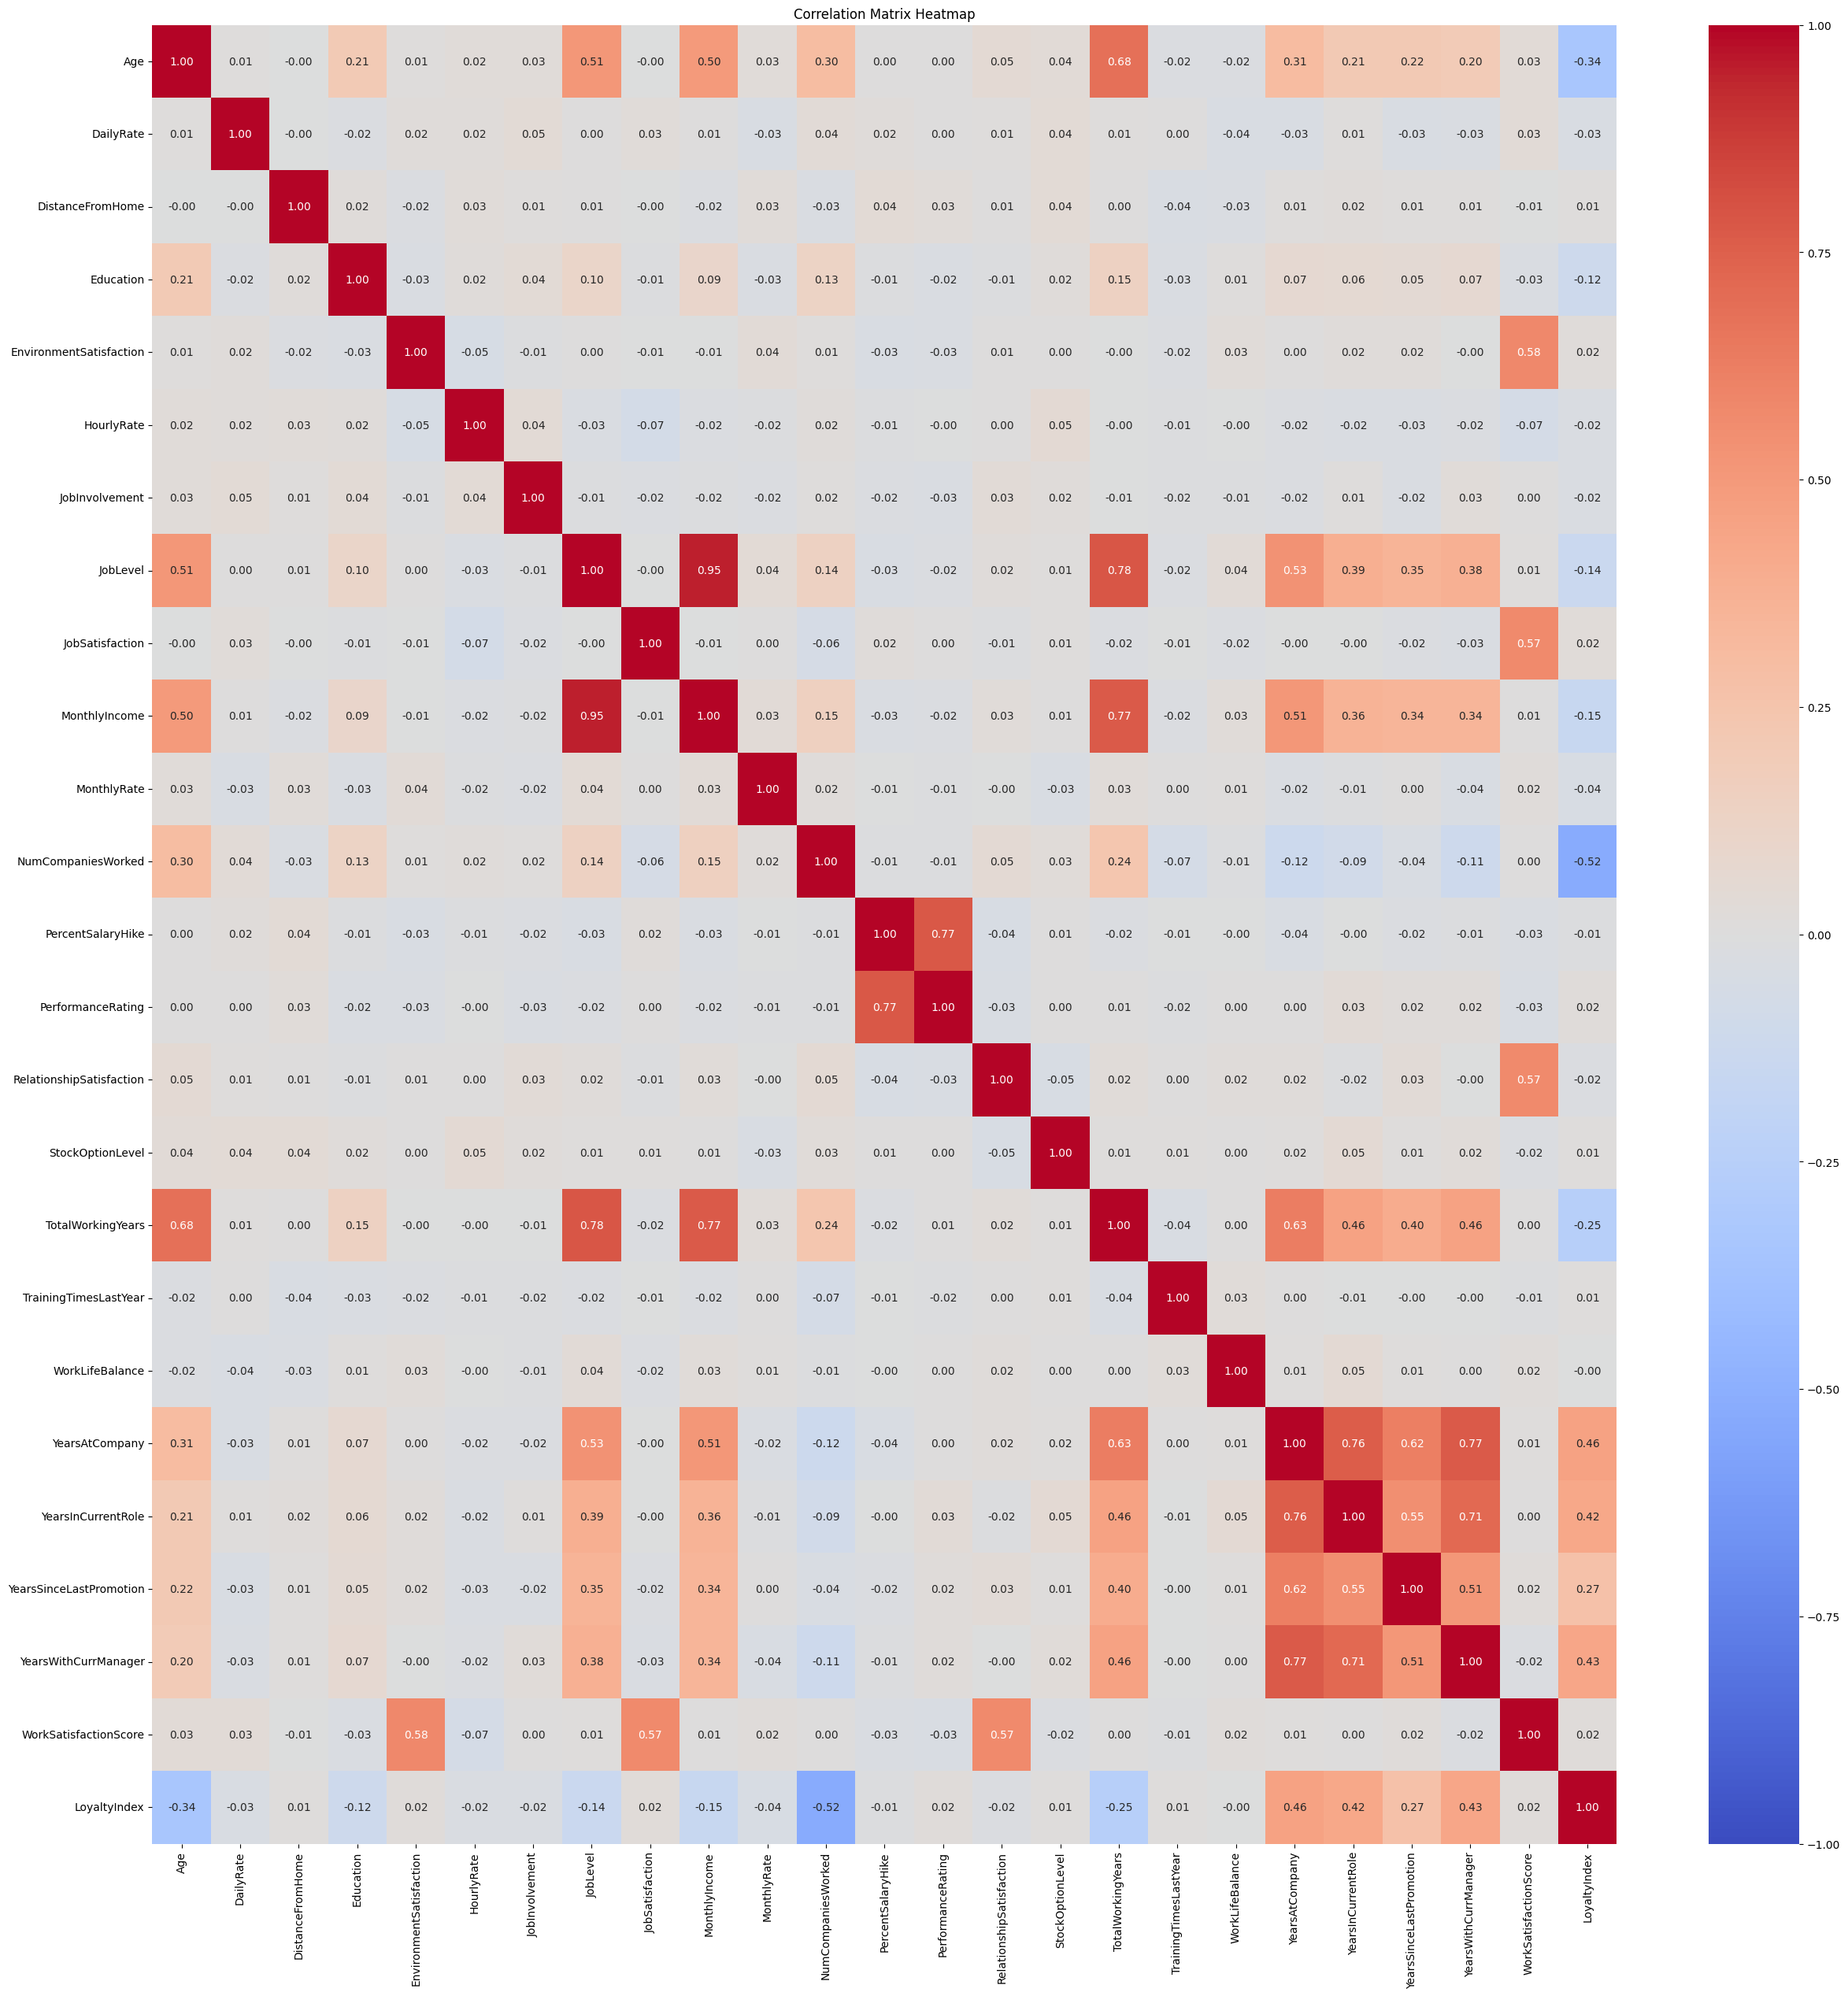

In [49]:
corr_matrix = df_original[numerical_cols].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [50]:
correlation_matrix = df_original[numerical_cols].corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper_triangle.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.7]

print(high_corr_pairs)

               Feature1              Feature2  Correlation
148            JobLevel         MonthlyIncome     0.950300
155            JobLevel     TotalWorkingYears     0.782208
186       MonthlyIncome     TotalWorkingYears     0.772893
222   PercentSalaryHike     PerformanceRating     0.773550
285      YearsAtCompany    YearsInCurrentRole     0.758754
287      YearsAtCompany  YearsWithCurrManager     0.769212
291  YearsInCurrentRole  YearsWithCurrManager     0.714365


In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_features = df.drop(columns=['Attrition'])
numeric_features = numeric_features.select_dtypes(include=[np.number])
numeric_features['constant'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

vif_data = vif_data[vif_data['feature'] != 'constant']
vif_data = vif_data.sort_values(by='VIF', ascending=False)

display(vif_data)

feature        VIF
7                   JobLevel  11.205067
9              MonthlyIncome  10.800070
16         TotalWorkingYears   4.767796
19            YearsAtCompany   4.587391
22      YearsWithCurrManager   2.774587
20        YearsInCurrentRole   2.718604
12         PercentSalaryHike   2.516385
13         PerformanceRating   2.513734
0                        Age   2.044890
21   YearsSinceLastPromotion   1.674278
11        NumCompaniesWorked   1.257737
3                  Education   1.059352
5                 HourlyRate   1.018318
1                  DailyRate   1.018198
15          StockOptionLevel   1.017682
6             JobInvolvement   1.016316
14  RelationshipSatisfaction   1.015771
2           DistanceFromHome   1.015515
18           WorkLifeBalance   1.014884
8            JobSatisfaction   1.014511
10               MonthlyRate   1.012282
4    EnvironmentSatisfaction   1.010099
17     TrainingTimesLastYear   1.009917

In [175]:
 df_original.drop(columns=['JobSatisfaction','EnvironmentSatisfaction','RelationshipSatisfaction','YearsAtCompany','TotalWorkingYears','JobLevel','PerformanceRating','YearsAtCompany'],inplace=True)

In [176]:
numerical_cols = df_original.select_dtypes(include=['number']).columns
categorical_cols = df_original.select_dtypes(include=['object','category']).columns

-----------------

## Encoding & Scaling

In [165]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [177]:
DF = df_original.copy()

In [178]:
DF.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'ExperienceLevel', 'WorkSatisfactionScore',
       'LoyaltyIndex'],
      dtype='object')

In [179]:
DF = pd.get_dummies(DF, columns=['BusinessTravel'], drop_first=True)

DF['Attrition'] = DF['Attrition'].replace('Yes',1)
DF['Attrition'] = DF['Attrition'].replace('No',0)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF = pd.get_dummies(DF, columns=['MaritalStatus'], drop_first=True)


DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF = pd.get_dummies(DF, columns=['EducationField'], drop_first=True)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',5)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)

DF['ExperienceLevel']=DF['ExperienceLevel'].replace('Junior',2)
DF['ExperienceLevel']=DF['ExperienceLevel'].replace('Mid',3)
DF['ExperienceLevel']=DF['ExperienceLevel'].replace('Senior',4)
DF['ExperienceLevel']=DF['ExperienceLevel'].replace('Director',5)

In [131]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [181]:
X = pd.DataFrame(DF.drop(columns='Attrition'))
Y = pd.DataFrame(DF.Attrition).values.reshape(-1, 1)

In [182]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 0,stratify=Y)

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.8963
Test Accuracy: 0.8844
----------------------------------------
Using RobustScaler with Logistic Regression:
Train Accuracy: 0.8963
Test Accuracy: 0.8878
----------------------------------------
Using StandardScaler with Logistic Regression:
Train Accuracy: 0.8963
Test Accuracy: 0.8878
----------------------------------------
Confusion Matrix for Logistic Regression using RobustScaler:


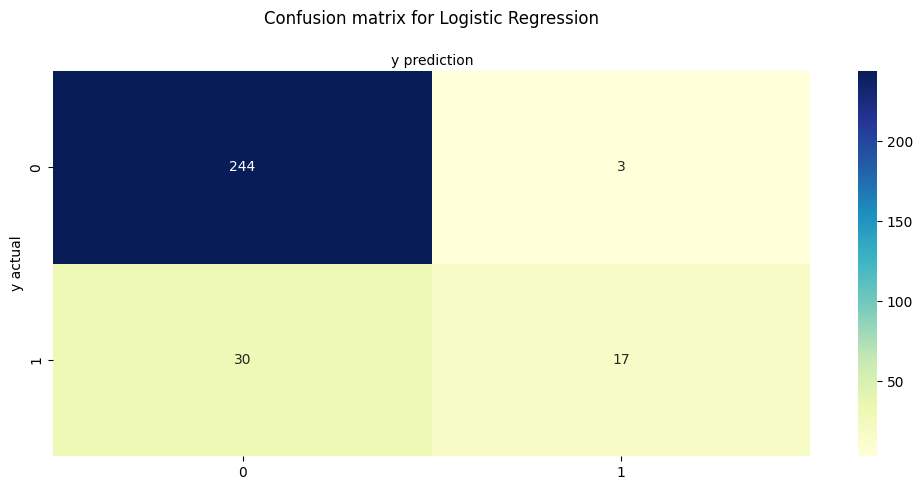

Using MinMaxScaler with SVC:
Train Accuracy: 0.8895
Test Accuracy: 0.8878
----------------------------------------
Using RobustScaler with SVC:
Train Accuracy: 0.8912
Test Accuracy: 0.8878
----------------------------------------
Using StandardScaler with SVC:
Train Accuracy: 0.8912
Test Accuracy: 0.8878
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


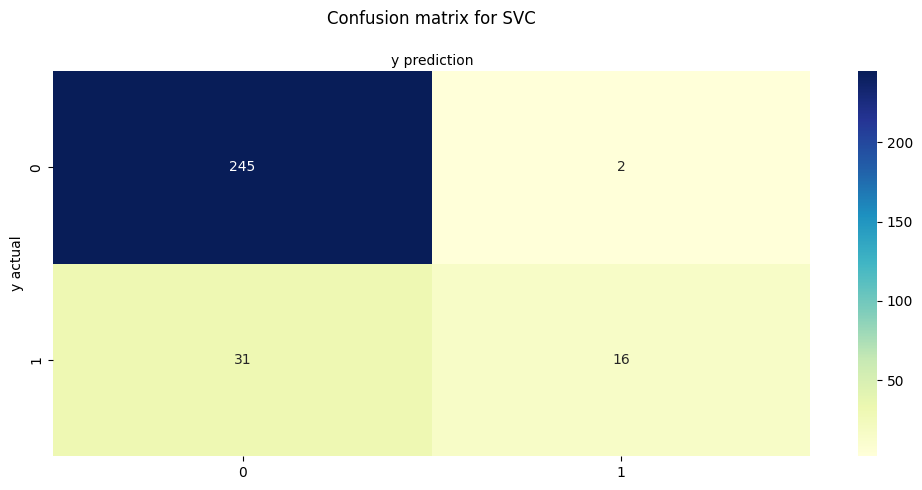

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 0.8274
Test Accuracy: 0.8027
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 0.8274
Test Accuracy: 0.8027
----------------------------------------
Using StandardScaler with Naive Bayes:
Train Accuracy: 0.8274
Test Accuracy: 0.8027
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


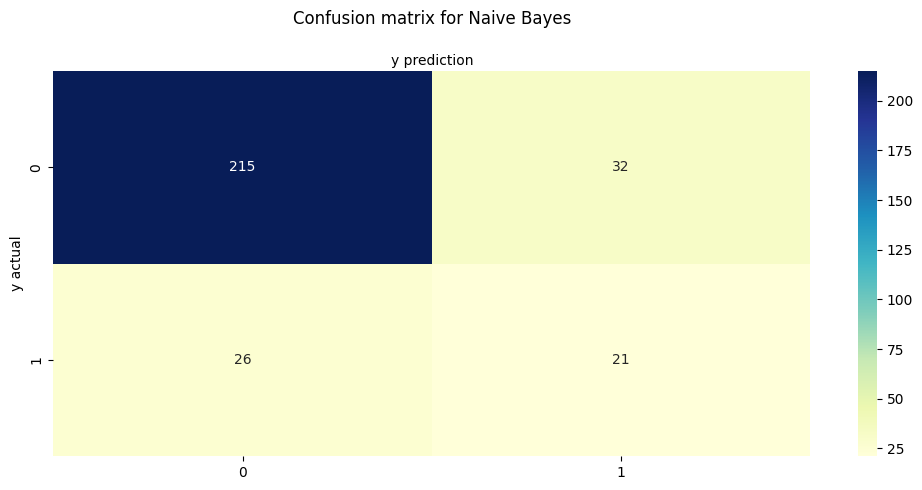

Using MinMaxScaler with KNN:
Train Accuracy: 0.8724
Test Accuracy: 0.8333
----------------------------------------
Using RobustScaler with KNN:
Train Accuracy: 0.8724
Test Accuracy: 0.8503
----------------------------------------
Using StandardScaler with KNN:
Train Accuracy: 0.8716
Test Accuracy: 0.8333
----------------------------------------
Confusion Matrix for KNN using RobustScaler:


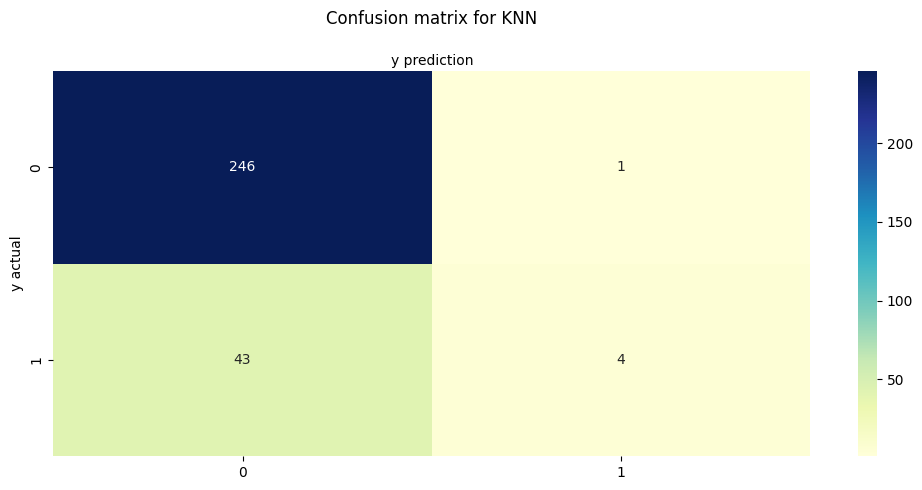

Using MinMaxScaler with Decision Tree:
Train Accuracy: 0.9728
Test Accuracy: 0.7993
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 0.9728
Test Accuracy: 0.7891
----------------------------------------
Using StandardScaler with Decision Tree:
Train Accuracy: 0.9728
Test Accuracy: 0.7993
----------------------------------------
Confusion Matrix for Decision Tree using MinMaxScaler:


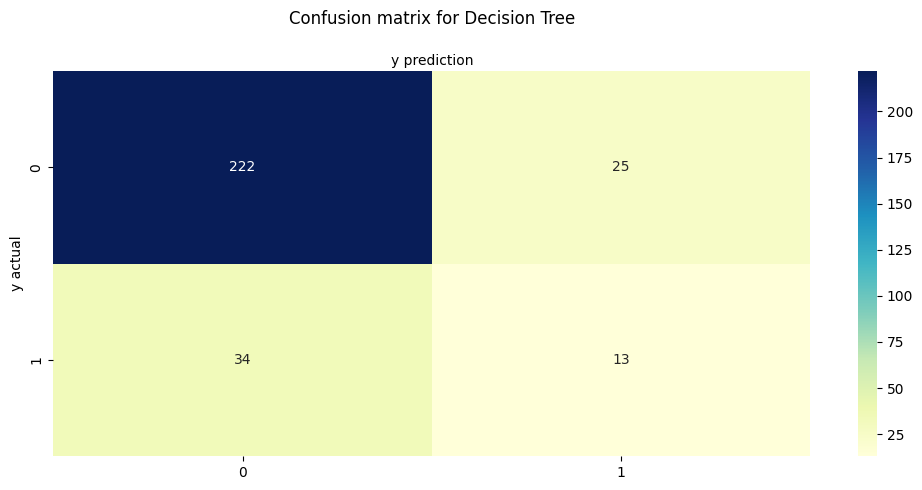

Using MinMaxScaler with Random Forest:
Train Accuracy: 0.8810
Test Accuracy: 0.8435
----------------------------------------
Using RobustScaler with Random Forest:
Train Accuracy: 0.8699
Test Accuracy: 0.8401
----------------------------------------
Using StandardScaler with Random Forest:
Train Accuracy: 0.8673
Test Accuracy: 0.8469
----------------------------------------
Confusion Matrix for Random Forest using StandardScaler:


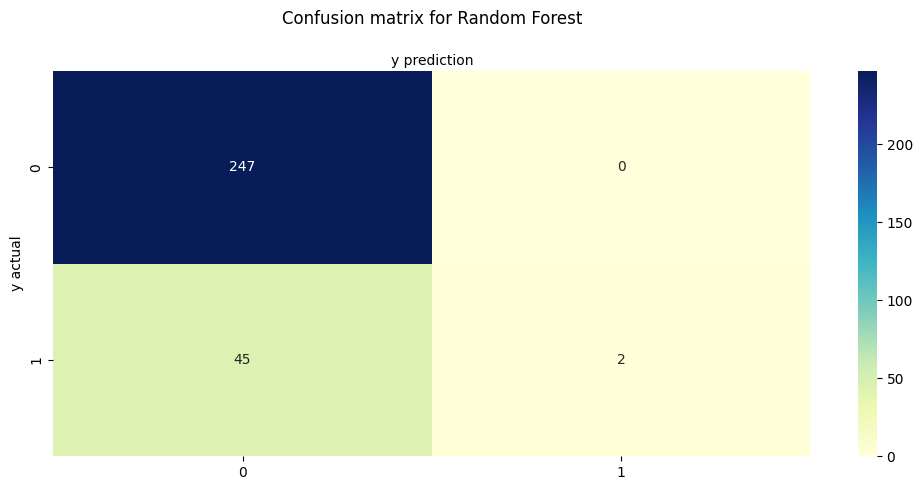

Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression    RobustScaler        0.896259       0.887755
1                  SVC    MinMaxScaler        0.891156       0.887755
2          Naive Bayes    MinMaxScaler        0.827381       0.802721
3                  KNN    RobustScaler        0.871599       0.850340
4        Decision Tree    MinMaxScaler        0.972789       0.799320
5        Random Forest  StandardScaler        0.867347       0.846939

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10,kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=15,max_depth=5)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        
        classifier.fit(x_train_scaled, y_train)
        y_pred = classifier.predict(x_test_scaled)
        
        
        train_accuracy = accuracy_score(y_train, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()
    
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)


## Applying SOMTE

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.9097
Test Accuracy: 0.8673
----------------------------------------
Using RobustScaler with Logistic Regression:
Train Accuracy: 0.9097
Test Accuracy: 0.8673
----------------------------------------
Using StandardScaler with Logistic Regression:
Train Accuracy: 0.9092
Test Accuracy: 0.8673
----------------------------------------
Confusion Matrix for Logistic Regression using MinMaxScaler:


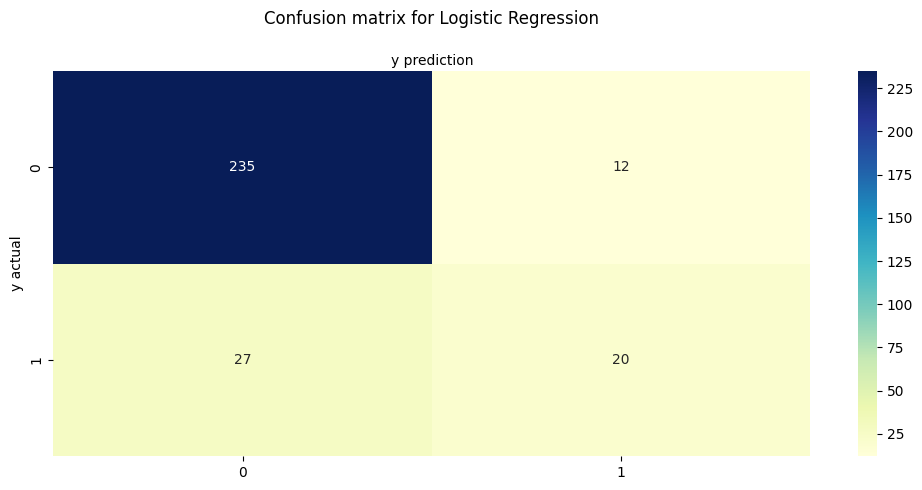

Using MinMaxScaler with SVC:
Train Accuracy: 0.9133
Test Accuracy: 0.8844
----------------------------------------
Using RobustScaler with SVC:
Train Accuracy: 0.9133
Test Accuracy: 0.8844
----------------------------------------
Using StandardScaler with SVC:
Train Accuracy: 0.9163
Test Accuracy: 0.8810
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


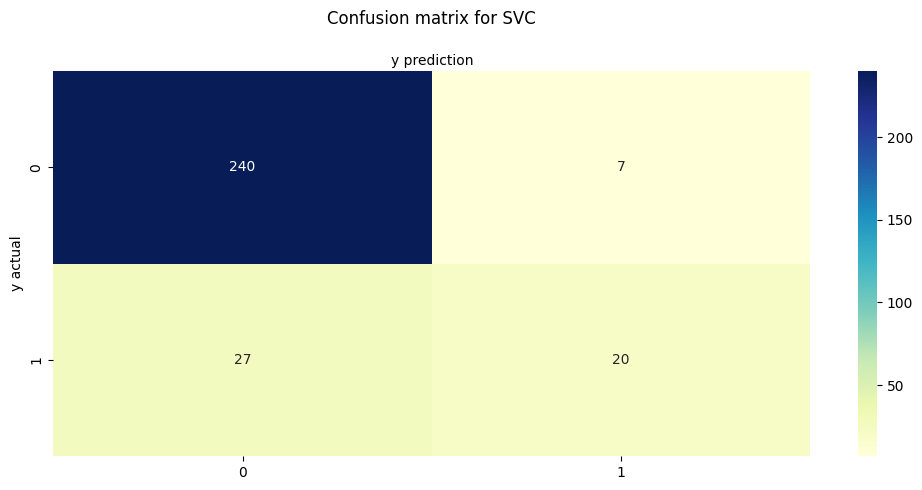

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 0.8469
Test Accuracy: 0.7449
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 0.8469
Test Accuracy: 0.7449
----------------------------------------
Using StandardScaler with Naive Bayes:
Train Accuracy: 0.8469
Test Accuracy: 0.7449
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


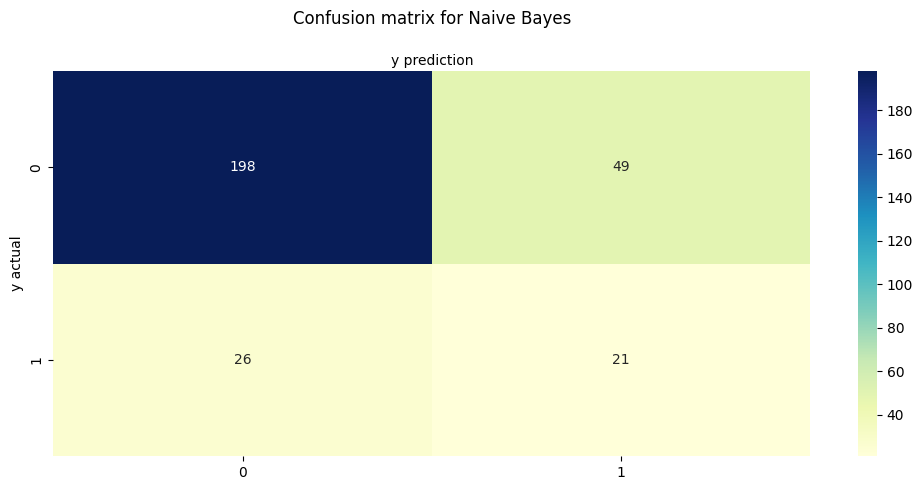

Using MinMaxScaler with KNN:
Train Accuracy: 0.9432
Test Accuracy: 0.8265
----------------------------------------
Using RobustScaler with KNN:
Train Accuracy: 0.9468
Test Accuracy: 0.7687
----------------------------------------
Using StandardScaler with KNN:
Train Accuracy: 0.9544
Test Accuracy: 0.7993
----------------------------------------
Confusion Matrix for KNN using MinMaxScaler:


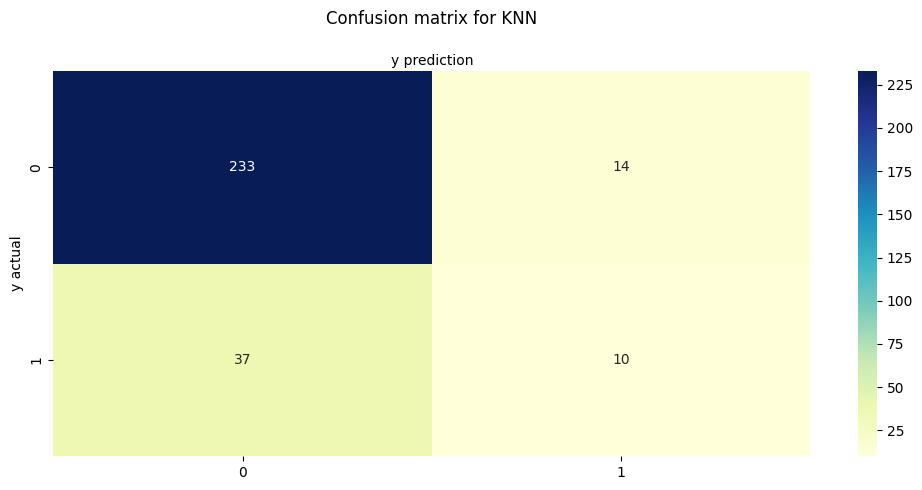

Using MinMaxScaler with Decision Tree:
Train Accuracy: 0.9828
Test Accuracy: 0.7653
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 0.9823
Test Accuracy: 0.7823
----------------------------------------
Using StandardScaler with Decision Tree:
Train Accuracy: 0.9823
Test Accuracy: 0.7653
----------------------------------------
Confusion Matrix for Decision Tree using RobustScaler:


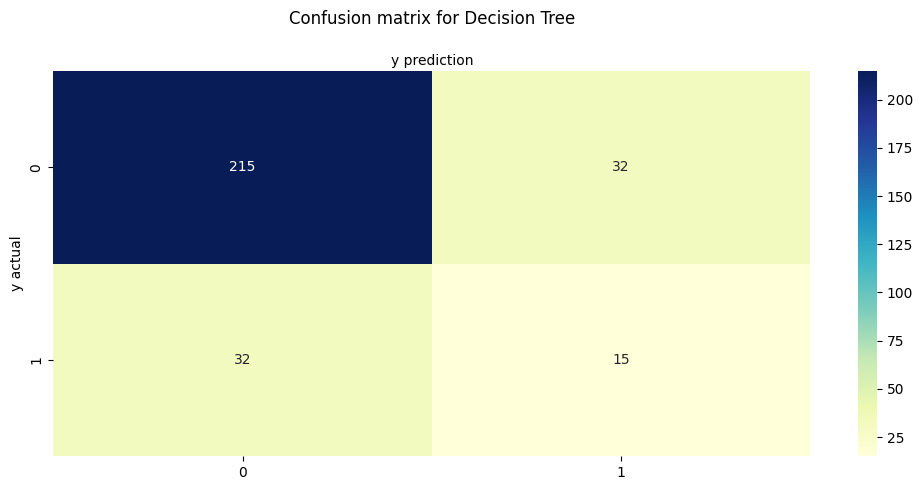

Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9031
Test Accuracy: 0.8299
----------------------------------------
Using RobustScaler with Random Forest:
Train Accuracy: 0.9087
Test Accuracy: 0.8231
----------------------------------------
Using StandardScaler with Random Forest:
Train Accuracy: 0.9148
Test Accuracy: 0.8537
----------------------------------------
Confusion Matrix for Random Forest using StandardScaler:


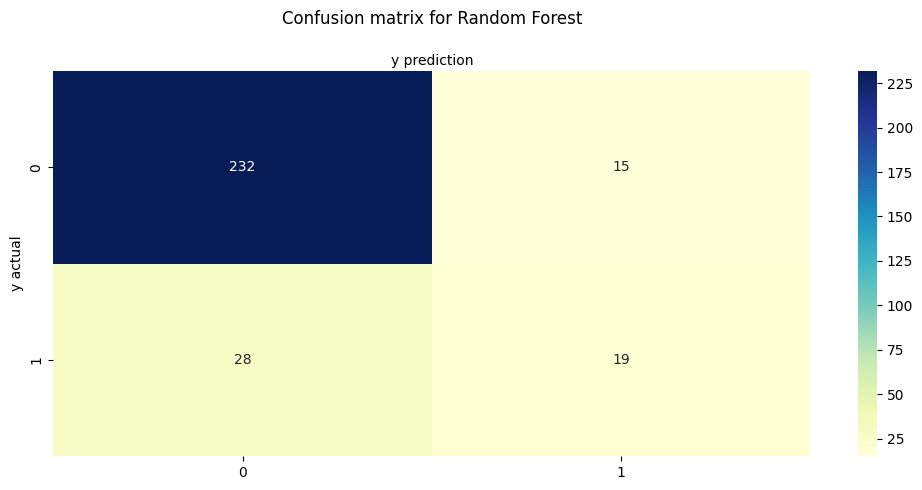

Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression    MinMaxScaler        0.909229       0.867347
1                  SVC    MinMaxScaler        0.916329       0.884354
2          Naive Bayes    MinMaxScaler        0.846856       0.744898
3                  KNN    MinMaxScaler        0.954361       0.826531
4        Decision Tree    RobustScaler        0.982252       0.782313
5        Random Forest  StandardScaler        0.914807       0.853741

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10, kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),#
    'Random Forest': RandomForestClassifier(n_estimators=15, max_depth=5)#
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy like 'median'
x_train_resampled = imputer.fit_transform(x_train_resampled)


for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train_resampled)
        x_test_scaled = scaler.transform(x_test)
        
        classifier.fit(x_train_scaled, y_train_resampled)
        y_pred = classifier.predict(x_test_scaled)
        
        train_accuracy = accuracy_score(y_train_resampled, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)
